<div style="border:solid green 2px; padding: 20px">
<b>Привет!</b>

Меня зовут Александр Пономаренко, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать data science. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самой найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

<div class="alert alert-info"> <b>Комментарий студента:</b> Привет! Спасибо за проделанное ревью! Я учел твои комментарии и значительно дополнил работу, тем не менее, у меня все ещё не получается достичь цели проекта: благодаря твоим комментариям мне удалось построить значительно лучшую Baseline-модель, но после подбора параметров, качество очень сильно падает.
Пожалуйста, подскажи, что я делаю не так.
</div>

# Прогнозирование температуры звезды

Вам пришла задача от обсерватории «Небо на ладони»: придумать, как с помощью нейросети определять температуру на поверхности обнаруженных звёзд. Обычно для расчёта температуры учёные пользуются следующими методами:

-   Закон смещения Вина.
-   Закон Стефана-Больцмана.
-   Спектральный анализ.

Каждый из них имеет плюсы и минусы. Обсерватория хочет внедрить технологии машинного обучения для предсказания температуры звёзд, надеясь, что этот метод будет наиболее точным и удобным.

В базе обсерватории есть характеристики уже изученных 240 звёзд.

## **Характеристики**

-   Относительная светимость `L/Lo` — светимость звезды относительно Солнца.
-   Относительный радиус `R/Ro` — радиус звезды относительно радиуса Солнца.
-   Абсолютная звёздная величина `Mv` — физическая величина, характеризующая блеск звезды.
-   Звёздный цвет (`white`, `red`, `blue`, `yellow`, `yellow-orange` и др.) — цвет звезды, который определяют на основе спектрального анализа.
-   Тип звезды:
    -   Коричневый карлик: 0
    -   Красный карлик: 1
    -   Белый карлик: 2
    -   Звёзды главной последовательности: 3
    -   Сверхгигант: 4
    -   Гипергигант: 5

-   Абсолютная температура `T(K)` — температура на поверхности звезды в Кельвинах.
    
В этом самостоятельном проекте вам необходимо разработать нейронную сеть, которая поможет предсказывать абсолютную температуру на поверхности звезды.

💡 Справочная информация: Светимость Солнца (англ. _Average Luminosity of Sun_) $L0$ =3.828⋅1026ВтL0​=3.828⋅1026Вт Радиус Солнца (англ. _Average Radius of Sun_) $R0$ =6.9551⋅108мR0​=6.9551⋅108м


**Цель работы** - разработать нейронную сеть для предсказания абсолютной температуры на поверхности звезды на основе характеристик звезд, таких как относительная светимость, относительный радиус, абсолютная звездная величина, звездный цвет и тип звезды.

**Основные этапы работы:**
1.  Загрузка и ознакомление с данными;
2.  Обработка и анализ данных;
3.  Препроцессинг выборок;
4.  Построение базовой нейронной сети;
5.  Улучшение нейронной сети;
6.  Выводы.

<div class="alert alert-info"> <b>Комментарий студента:</b>

Привет! Прошу прощения за недоделанную работу, но мне уже точно нужна помощь - я сделал все, что мог, но не смог реализовать достаточный RMSE на нейронной сети. Прошу помочь и указать на ошибки. Спасибо!
</div>

# Библиотеки, установки и функции

In [1]:
import os
import warnings
import time
import re
import random


import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


import torch
import torch.nn as nn
import torch.optim as optim
from skorch.callbacks import EpochScoring, EarlyStopping
from skorch.dataset import ValidSplit 
from skorch import NeuralNetRegressor

import optuna


from torchmetrics import MeanSquaredError
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавлены библиотеки optuna и skorch
</div>

## Константы и установки

In [2]:
DATA_PATH1 = "./6_class.csv"
DATA_PATH2 = "./datasets/6_class.csv"


RANDOM_STATE = 42
TEST_SIZE = 0.2

SCALER = MinMaxScaler()
OHE = OneHotEncoder(drop="first")


random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.use_deterministic_algorithms(True)


sns.set_theme(style="whitegrid")

warnings.filterwarnings("ignore")
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Огонь, данные на месте:)</div>

## Функции

### Работа с данными

In [3]:
def df_quik_view(df, asc=False):
    '''
    This function provides a quick overview of the input DataFrame by
    returning a summary table containing information such as number of
    unique values, missing values, data type, completeness percentage, and
    unique values of each column in the DataFrame. It also prints general 
    information such as the shape of the table, the number and percentage of
    duplicates in the table, and the memory usage of the table.
    
    Parameters:
    df (pd.DataFrame): a pandas DataFrame to analyze.
    asc (bool): a boolean value indicating whether to sort unique values in
                ascending order. Default is False, which means descending order.
    
    Returns:
    pd.DataFrame: a summary table of the input DataFrame containing the number
                  of unique values, missing values, data type, completeness
                  percentage, and unique values of each column.
    '''
    unique_values = []
    for i in df.columns:
        unique_values.append(df[i].sort_values(ascending=asc).unique())

    table_scan = pd.DataFrame(
        {
            'values_num': df.count(),
            'nulls_num': df.isna().sum(),
            'completeness': 100 - (df.isna().sum() / (df.isna().sum() + 
                                                      df.notna().sum()) * 100),
            'uniques_num': df.nunique(),
            'unique_values': unique_values,
            'dtype': df.dtypes
        }
    )

    memory = df.memory_usage(index=False).sum() / 1_000_000

    print('General data analysis:')
    print()
    print('Shape of the table:     ', df.shape)
    print('Duplicates in the table: {}, ({}%)'
          .format(df.duplicated().sum(),
                  round(df.duplicated().sum() / df.shape[0], 4) * 100)
         )
    print('Memory usage:            ' + str(round(memory, 1)) + '+ MB')
    print()
    return table_scan

In [4]:
def change_dtypes(data, **dtypes):
    '''
    This function changes the data types of the specified columns in a pandas
    DataFrame and returns the updated DataFrame.
        
    Parameters:
    data (pd.DataFrame): a pandas DataFrame to modify.
    **dtypes (dict): keyword arguments representing the column names and
    new data types to apply to the columns.
        
    Returns:
    pd.DataFrame: a pandas DataFrame with updated data types for the
    specified columns.
    '''
    memory_before = data.memory_usage(index=False).sum()
    print(f'Initial value of memory usage:                 ', memory_before)

    data = data.astype(dtypes)

    memory_after = data.memory_usage(index=False).sum()
    memory_percent = round(
        (memory_before - memory_after) / memory_before * 100,2)

    print('Value of memory usage after changing data types:', memory_after)
    print()
    print(f'Memory usage reduced by {memory_percent}%', '\n')

    return data

In [5]:
def group_colors(ds):
    colors = {
        "reds": [],
        "oranges": [],
        "blues": [],
        "whites": [],
        "yellows": [],
        "others": [],
    }

    for color in ds["color"].unique():
        if "red" in color:
            colors["reds"].append(color)
        elif "orange" in color:
            colors["oranges"].append(color)
        elif "blue" in color:
            colors["blues"].append(color)
        elif "white" in color:
            colors["whites"].append(color)
        elif "yellow" in color:
            colors["yellows"].append(color)
        else:
            colors["others"].append(color)

    print("RED: \n", colors["reds"], "\n")
    print("ORANGE: \n", colors["oranges"], "\n")
    print("BLUE: \n", colors["blues"], "\n")
    print("WHITE: \n", colors["whites"], "\n")
    print("YELLOW: \n", colors["yellows"], "\n")
    if len(colors["others"]) > 0:
        print()
        print("-------------------------")
        print("UNMATCHED COLORS:")
        print(colors["others"])

    return colors

In [6]:
def remove_outs(data, feature):
    data = data[feature]

    i = data.quantile(q=0.75) - data.quantile(q=0.25)

    w1 = data.quantile(q=0.25) - 1.5 * (i)
    w2 = data.quantile(q=0.75) + 1.5 * (i)

    data = data.where(data > w1, None)
    data = data.where(data < w2, None)
    
    return data

### Визуализация

In [7]:
def create_visualization(data, dtype, target, is_cat_target=False,
                         figsize=None, bins=50):
    '''
    This function creates visualizations for scalar and categorical
    features and the target variable. It uses the seaborn and matplotlib
    libraries for plotting.

    Parameters:
    data (pandas.DataFrame): The dataset to be visualized.
    dtype (str): Type of visualization to be created. 'scalars' for quantitative
                 features, 'categories' for categorical features and target
                 variable prevalence, 'target' for target variable distribution.
    target (str): The name of the target variable.
    is_cat_target (bool, optional): If True, the target variable is categorical.
                                    Default is False.
    figsize (tuple, optional): Figure size. Default is None.
    bins (int, optional): Number of bins for histograms. Default is 50.

    Returns:
    None.
    '''
    sns.set_theme(style="white")
    if dtype == 'scalars':
        target_nunique = data[target].nunique()

        print('Visualization of quantitative features distribution:')
        print()

        if is_cat_target:
            for i in data.drop(target, axis=1):
                if data[i].dtype != 'O' and data[i].unique().shape[0] > 10:
                    print(f'Feature: {i}')

                    figure, (ax_box, ax_hist) = plt.subplots(
                        2, 1, sharex=True,
                        gridspec_kw={'height_ratios': (.3, .7)},
                        figsize=(9, 7) if figsize is None else figsize)

                    sns.despine(fig=None, ax=None, top=True, right=True,
                                left=False, bottom=False, offset=None,
                                trim=False)

                    sns.boxplot(data=data, x=i, y=target, orient='h',
                                ax=ax_box).set_title(i, y=1.5, fontsize=14)
                    sns.histplot(data=data, x=i, hue=target, kde=True, 
                                 bins=bins).set_ylabel('Amount')

                    plt.show()
                    print()
                    print('Feature statistics:')
                    display(pd.DataFrame(data[i].describe()).apply(round,
                                                                   args=[2]))
        else:
            for i in data.drop(target, axis=1):
                if data[i].dtype != 'O' and not is_cat_target:
                    print(f'Feature: {i}')

                    figure, (ax_box, ax_hist) = plt.subplots(
                        2, 1, sharex=True,
                        gridspec_kw={'height_ratios': (.3, .7)},
                        figsize=(9, 7) if figsize is None else figsize)

                    sns.despine(fig=None, ax=None, top=True, right=True,
                                left=False, bottom=False, offset=None,
                                trim=False)

                    sns.boxplot(data=data, x=i, ax=ax_box).set_title(
                        i, y=1.5, fontsize=14)
                    sns.histplot(data=data, x=i, kde=True, bins=bins
                                 ).set_ylabel('Amount')

                    plt.show()
                    print()
                    print('Feature statistics:')
                    display(pd.DataFrame(data[i].describe()).apply(round,
                                                                   args=[2]))
    elif dtype == 'categories':
        sns.set_theme(style="whitegrid")
        print('Visualization of categorical features and target prevalence:')
        print()

        for i in data.drop(target, axis=1):
            if data[i].dtype == 'O' or is_cat_target:
                bar_data = data[i].value_counts().reset_index().rename(
                    columns={'index': data[i].name, data[i].name: 'Count'}
                    ).sort_values(by=i)

                if is_cat_target:
                    prev_data = (data.groupby([i])[target]
                                 .value_counts(normalize=True)
                                 .reset_index(name='prevalance'))
                    prev_data['prevalance'] = (
                        prev_data['prevalance'].round(4) * 100)
                else:
                    prev_data = (data.groupby([i])[target]
                                 .mean()
                                 .reset_index(name='target_mean'))
                    prev_data['target_mean'] = prev_data['target_mean'].round(2)

                print(f'Feature: {i}')

                figure, (ax_bar, ax_prev) = plt.subplots(
                    1, 2, figsize=(18, 5) if figsize is None else figsize)

                sns.barplot(data=bar_data, x=i, y='Count',
                            linewidth=0.5, ax=ax_bar,
                            color='#CC8963', alpha=0.8).set_title(
                                f'{i} distribution', y=1.02, fontsize=14)
                if is_cat_target:
                    try:
                        sns.barplot(data=prev_data, x=i, y='prevalance',
                                    hue=target, linewidth=0.5,
                                    palette={0: '#008744', 1: '#d62d20'},
                                    ax=ax_prev, alpha=0.8).set_title(
                                        f'target prevalence, %', y=1.02,
                                        fontsize=14)
                    except:
                        sns.barplot(data=prev_data, x=i, y='prevalance',
                                    hue=target, ax=ax_prev, alpha=0.8
                                    ).set_title(f'target prevalence, %', y=1.02,
                                                fontsize=14)
                else:
                    sns.barplot(data=prev_data, x=i, y='target_mean',
                                color='#008744', alpha=0.8).set_title(
                                    f'target means', y=1.02, fontsize=14)

                r_ = 0 if bar_data.shape[0] < 5 else 90
                ax_bar.tick_params(axis='x', rotation=r_)
                ax_prev.tick_params(axis='x', rotation=r_)

                plt.show()
                print()
    elif dtype == 'target':
        print('Visualization of target distribution:')
        print()
        print(f'Target: {target}')

        if is_cat_target:
            plt.figure(figsize=(5, 5) if figsize is None else figsize)

            target_ = data[target].value_counts().reset_index().rename(
                columns={'index': data[target].name,
                         data[target].name: 'Amount'})

            sns.barplot(
                data=target_,
                x=target, y='Amount'
            ).set_title(f"Target {target} categories", y=1.02, fontsize=14)

            plt.show()
            print()
            print('Target statistics:')
            display(pd.DataFrame(data[target].describe()))
        else:
            print('Visualization of target distribution:')
            print()
            print(f'Target: {target}')

            figure, (ax_box, ax_hist) = plt.subplots(
                2, 1, sharex=True, gridspec_kw={'height_ratios': (.25, .75)},
                figsize=(9, 7) if figsize is None else figsize)

            sns.despine(fig=None, ax=None, top=True, right=True, left=False,
                        bottom=False, offset=None, trim=False)

            sns.boxplot(data=data,
                        x=target, ax=ax_box
            ).set_title(f"Target {target} distribution", y=1.5, fontsize=14)
            sns.histplot(data=data, x=target, kde=True, bins=bins)

            plt.show()
            print()
            print('Feature statistics:')
            display(pd.DataFrame(data[target].describe()))

    print()

In [8]:
def visualize_feature_for_target_classes(ds, feature, target, target_class):
    '''
    This function generates a visualization of a specific feature for a target
    class in a dataset.

    Parameters:
    ds (pandas.DataFrame): The input dataset.
    feature (str): The feature for which to generate a visualization.
    target (str): The name of the target column in the dataset.
    target_class (str): The target class for which to generate the visualization.

    Returns:
    None
    '''
    print(f"---------- {feature.title()} statistics for target class {target_class} ----------")
    print()
    create_visualization(data=ds[ds[target] == target_class][[feature, target]],
                         dtype="scalars", target="type", is_cat_target=True,
                         figsize=(9, 6))

In [9]:
def get_corr_map(df, method="pearson", figisze=(15, 12)):
    '''
    This function takes a pandas DataFrame and generates a correlation matrix
    using the specified correlation method. The resulting matrix is plotted as
    a heatmap using seaborn library.

    Parameters:
    df (pandas.DataFrame): The input dataframe
    method (str), default="pearson": The correlation method to be used.
                                     The options are 'pearson', 'kendall',
                                     or 'spearman'.
    figisze (tuple): default=(15, 12) The figure size of the resulting plot.
    
    Returns:
    None
    '''
    plt.figure(figsize=figisze)
    sns.heatmap(
        round(df.corr(method=method), 2), vmax=1, vmin=-1, square=True,
        linewidths=3, annot=True, cmap='coolwarm'
    )
    plt.show()

In [10]:
def check_preds(df):
    '''
    This function takes a pandas DataFrame and generates a line plot to compare
    the actual and predicted values for a target variable.
    The function is useful for visually assessing the quality of a
    predictive model's performance.

    Parameters:
    df (pandas.DataFrame): The input dataframe

    Returns:
    None
    '''
    df = pd.DataFrame({
        'Star number': range(len(df)),
        'Actual': df['real_target'],
        'Predicted': df['predicted_target']
    })

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=df.index, y='Actual', data=df, color="#008744")
    sns.lineplot(x=df.index, y='Predicted', data=df, color="#d62d20")
    
    plt.xlabel('Star number')
    plt.ylabel('Temperature, K')
    plt.title('Fact - Prediction')
    plt.legend(labels=['Real', 'Predicted'])
    plt.show()

### Замер времени

In [11]:
def exec_time(start, end):
    '''
    This function calculates the difference between two given datetime objects
    and returns the difference in the format of HH:MM:SS.

    Parameters
    start: datetime object
    end: datetime object
    Returns
    diff_time (str): The difference between the two given datetime objects in
                     the format of HH:MM:SS.
    '''
    diff_time = end - start
    m, s = divmod(diff_time, 60)
    h, m = divmod(m, 60)
    s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))

    return "{0:02d}:{1:02d}:{2:02d}".format(h, m, s)

### ML

In [12]:
def train_model(model, X_train, y_train, eval_set, num_epochs=10, butch_size=2,
                early_stopping_rounds=5, verbose=True, verbose_eval=5,
                plot=True):
    start_time = time.time()
    print(f"The model started training at {start_time}\n")

    model.fit(
        X_train, y_train, eval_set=eval_set, num_epochs=num_epochs,
        batch_size=butch_size, early_stopping_rounds=early_stopping_rounds,
        verbose=verbose, verbose_eval=verbose_eval, plot=plot)
    stop_type = time.time()
    print("\n")
    print("================================================")
    print("Training completed.")
    print("Studying time:", exec_time(start_time, stop_type))
    
    return model

# Загрузка данных и первичная обработка

## Загрузка данных

In [13]:
if os.path.exists(DATA_PATH1):
    data = pd.read_csv(DATA_PATH1)
elif os.path.exists(DATA_PATH2):
    data = pd.read_csv(DATA_PATH2)
else:
    raise Exception("Path doesn't exist!")

data.head()

,Unnamed: 0,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,0,3068,"0,0024","0,17","16,12",0,Red
1,1,3042,"0,0005","0,1542","16,6",0,Red
2,2,2600,"0,0003","0,102","18,7",0,Red
3,3,2800,"0,0002","0,16","16,65",0,Red
4,4,1939,"0,000138","0,103","20,06",0,Red


## Ознакомление с данными и приведение в рабочий вид

In [14]:
df_quik_view(data)

General data analysis:

Shape of the table:      (240, 7)
Duplicates in the table: 0, (0.0%)
Memory usage:            0.0+ MB



,values_num,nulls_num,completeness,uniques_num,unique_values,dtype
Unnamed: 0,240,0,100.0,240,"[239, 238, 237, 236, 235, 234, 233, 232, 231, ...",int64
Temperature (K),240,0,100.0,228,"[40000, 39000, 38940, 38234, 37882, 37800, 361...",int64
Luminosity(L/Lo),240,0,100.0,208,"[998, 9,25, 883, 849420, 834042, 813000, 8,7, ...",object
Radius(R/Ro),240,0,100.0,216,"[98, 97, 955, 92, 89, 88, 876, 86, 84, 83, 81,...",object
Absolute magnitude(Mv),240,0,100.0,228,"[6,506, 6,228, 5,49, 5,05, 5,03, 4,78, 4,68, 4...",object
Star type,240,0,100.0,6,"[5, 4, 3, 2, 1, 0]",int64
Star color,240,0,100.0,17,"[yellowish, yellow-white, white, Yellowish Whi...",object


При первичном ознакомлении и высокоуровневом анализе данных можно выделить следующие моменты, требующие обработки:

1. Имена полей пишутся с использованием пробелов, заглавных букв и небуквенных символов, что может затруднять дальнейшую работу;
2. Используемые типы данных требуют чрезмерного объема памяти для своих значений;
3. Количественные признаки указаны в виде строки и с использованием запятой вместо плавующей точки.

Решим данные моменты.

### Приведение названий полей к единому стилю

In [15]:
data = data.drop('Unnamed: 0', axis=1)
data = data.rename(
    columns={
        "Temperature (K)":          "temperature",
        "Luminosity(L/Lo)":         "luminosity",
        "Radius(R/Ro)":             "radius",
        "Absolute magnitude(Mv)":   "magnitude",
        "Star type":                "type",
        "Star color":               "color"
    }
)

print('Сolumn names after processing:')
data.columns

Сolumn names after processing:


Index(['temperature', 'luminosity', 'radius', 'magnitude', 'type', 'color'], dtype='object')

### Оптимизация использования памяти и обработка количественных полей

In [16]:
data["luminosity"] = data["luminosity"].str.replace(",", ".").apply(float)
data["radius"] = data["radius"].str.replace(",", ".").apply(float)
data["magnitude"] = data["magnitude"].str.replace(",", ".").apply(float)

dtypes = {
    "temperature":      "int32",
    "luminosity":       "float32",
    "radius":           "float16",
    "magnitude":        "float16",
    "type":             "int8"
}

data = change_dtypes(data, **dtypes)
df_quik_view(data)

Initial value of memory usage:                  11520
Value of memory usage after changing data types: 5040

Memory usage reduced by 56.25% 

General data analysis:

Shape of the table:      (240, 6)
Duplicates in the table: 0, (0.0%)
Memory usage:            0.0+ MB



,values_num,nulls_num,completeness,uniques_num,unique_values,dtype
temperature,240,0,100.0,228,"[40000, 39000, 38940, 38234, 37882, 37800, 361...",int32
luminosity,240,0,100.0,208,"[849420.0, 834042.0, 813000.0, 783930.0, 74889...",float32
radius,240,0,100.0,216,"[1948.0, 1783.0, 1779.0, 1679.0, 1673.0, 1648....",float16
magnitude,240,0,100.0,226,"[20.06, 20.02, 19.94, 19.62, 19.56, 19.45, 19....",float16
type,240,0,100.0,6,"[5, 4, 3, 2, 1, 0]",int8
color,240,0,100.0,17,"[yellowish, yellow-white, white, Yellowish Whi...",object


# Предобработка и анализ данных

## Целевой признак - `temperature`

Visualization of target distribution:

Target: temperature
Visualization of target distribution:

Target: temperature


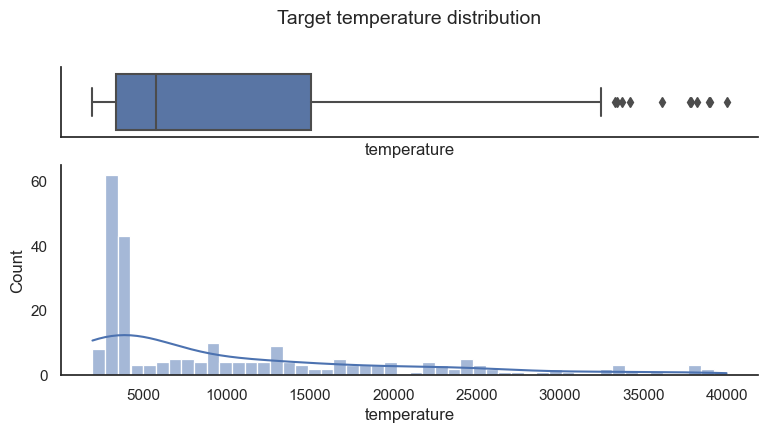


Feature statistics:


,temperature
count,240.000000
mean,10497.462500
std,9552.425037
min,1939.000000
25%,3344.250000
50%,5776.000000
75%,15055.500000
max,40000.000000


In [17]:
create_visualization(data=data, dtype="target", target="temperature",
                     is_cat_target=False, figsize=(9, 4))

Целевой признак представлен неравномерным распределением с наличием выбросов, что в совокупности с крайне малым количеством данных может осложнить построение модели.

Учтем данный фактор, а также разобъем целевой признак поквантильно на 4 категории для удобства анализа дальнейших параметров.

In [18]:
data["temperature_cats"] = pd.qcut(data["temperature"], 4)
data["temperature_cats"].unique()

[(1938.999, 3344.25], (3344.25, 5776.0], (15055.5, 40000.0], (5776.0, 15055.5]]
Categories (4, interval[float64, right]): [(1938.999, 3344.25] < (3344.25, 5776.0] < (5776.0, 15055.5] < (15055.5, 40000.0]]

## luminosity

Visualization of quantitative features distribution:

Feature: luminosity


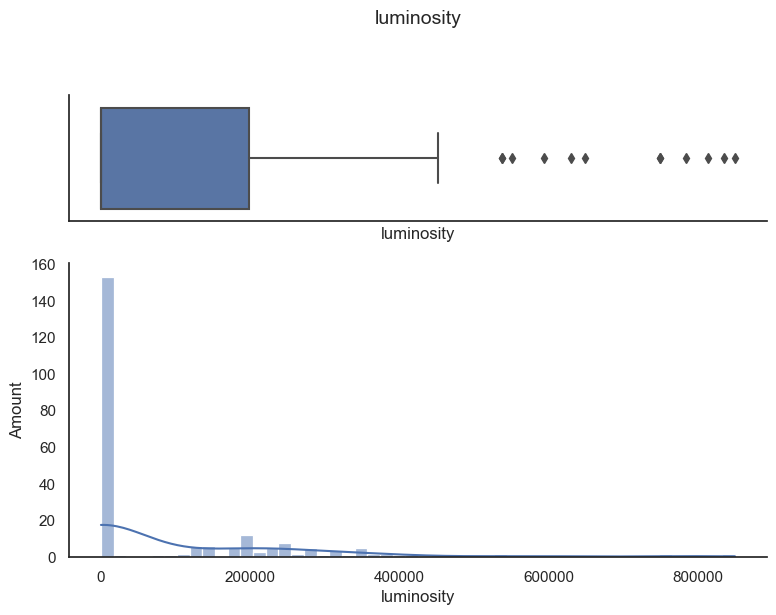


Feature statistics:


,luminosity
count,240.00
mean,107188.36
std,179432.19
min,0.00
25%,0.00
50%,0.07
75%,198050.00
max,849420.00


In [19]:
create_visualization(data=data[["luminosity", "temperature"]], dtype="scalars",
                     target="temperature", is_cat_target=False, figsize=(9, 6))

Данные представлены очень неравномерно - присутствует как преимещество нулевых значений, так и выбросы.

Visualization of quantitative features distribution:

Feature: luminosity


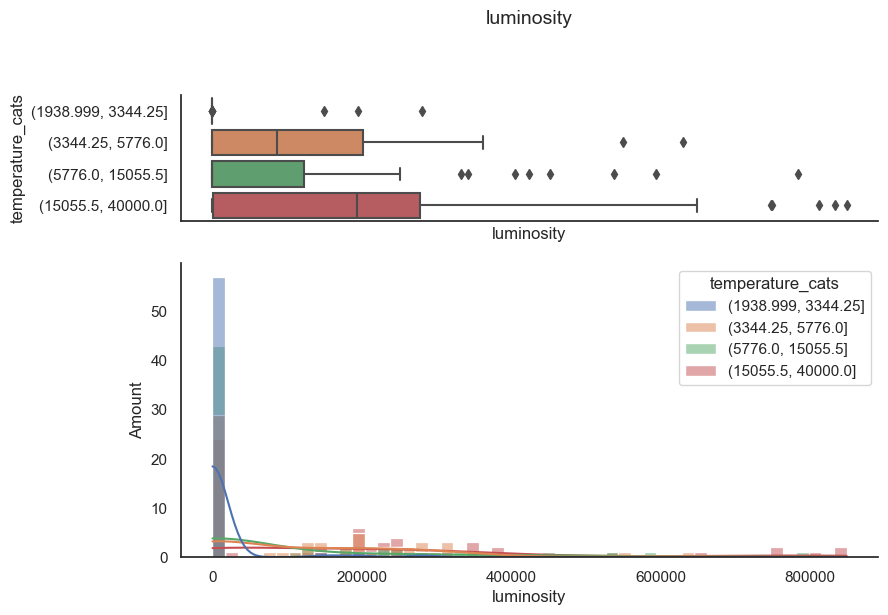


Feature statistics:


,luminosity
count,240.00
mean,107188.36
std,179432.19
min,0.00
25%,0.00
50%,0.07
75%,198050.00
max,849420.00


In [20]:
create_visualization(data=data[["luminosity", "temperature_cats"]], dtype="scalars",
                     target="temperature_cats", is_cat_target=True, figsize=(9, 6))

Можно увидеть, что для разных категорий целевого признака у параметра присутствуют свои средние значения с прямой связью: чем больше данный параметр, тем выше температура звезды.

Visualization of categorical features and target prevalence:

Feature: is_luminosity


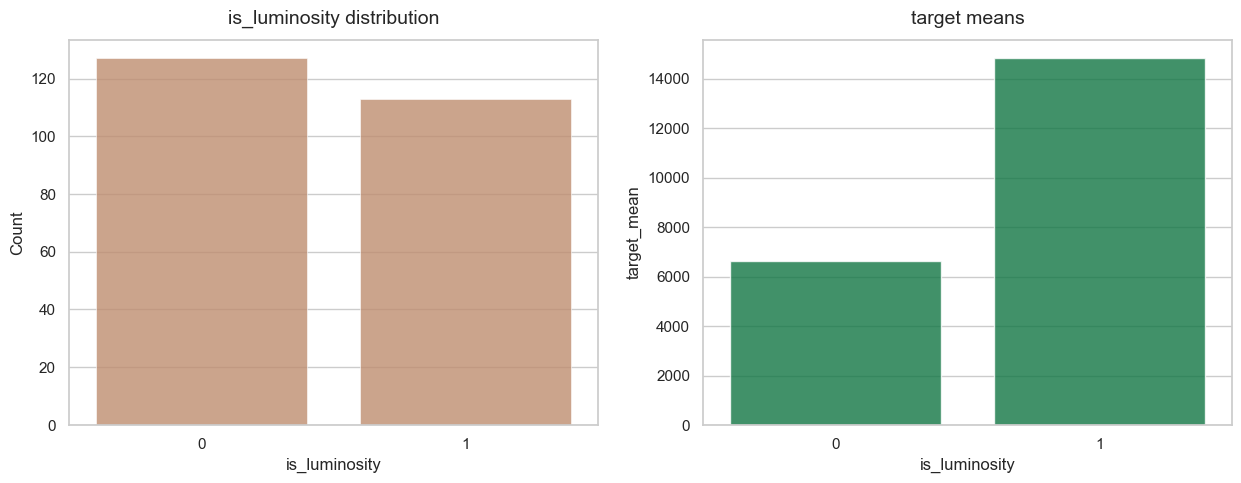

In [21]:
data["is_luminosity"] = data["luminosity"].apply(
    lambda x: 1 if x > 1 else 0).astype("object")

create_visualization(data=data[["is_luminosity", "temperature"]], dtype="categories",
                     target="temperature", is_cat_target=False, figsize=(15, 5))

Выявленная взаимосвязь отлично прослеживается и при привидении параметра к бинарному виду. Учтем этот факт при построении датасета.

## radius

Visualization of quantitative features distribution:

Feature: radius


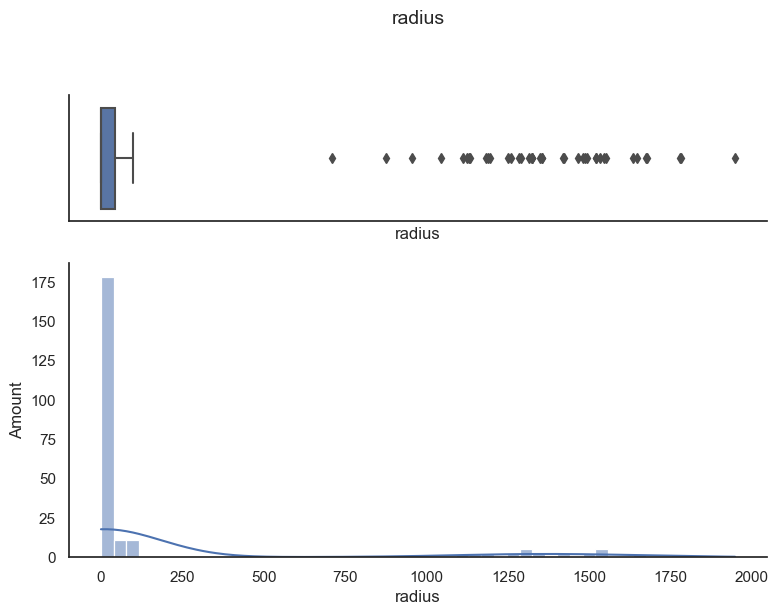


Feature statistics:


,radius
count,240.00
mean,237.25
std,inf
min,0.01
25%,0.10
50%,0.76
75%,42.75
max,1948.00


In [22]:
create_visualization(data=data[["radius", "temperature"]], dtype="scalars",
                     target="temperature", is_cat_target=False, figsize=(9, 6))

Данные представлены очень неравномерно - присутствует как преимещество нулевых значений, так и выбросы.

Visualization of quantitative features distribution:

Feature: radius


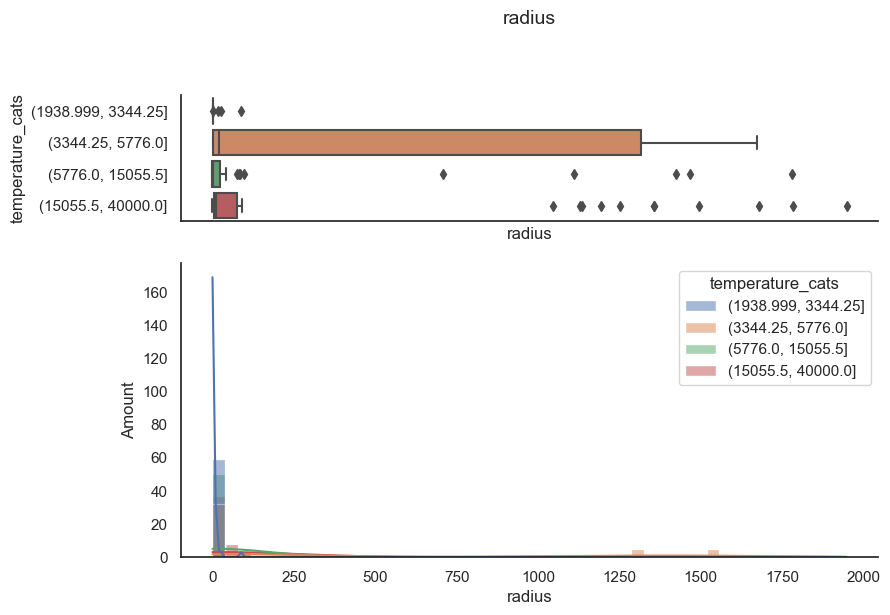


Feature statistics:


,radius
count,240.00
mean,237.25
std,inf
min,0.01
25%,0.10
50%,0.76
75%,42.75
max,1948.00


In [23]:
create_visualization(data=data[["radius", "temperature_cats"]], dtype="scalars",
                     target="temperature_cats", is_cat_target=True, figsize=(9, 6))

Можно увидеть, что значение целевого признака от радиуса не является явным, хотя и прослеживается небольшая прямая зависимость.

Visualization of categorical features and target prevalence:

Feature: is_big_radius


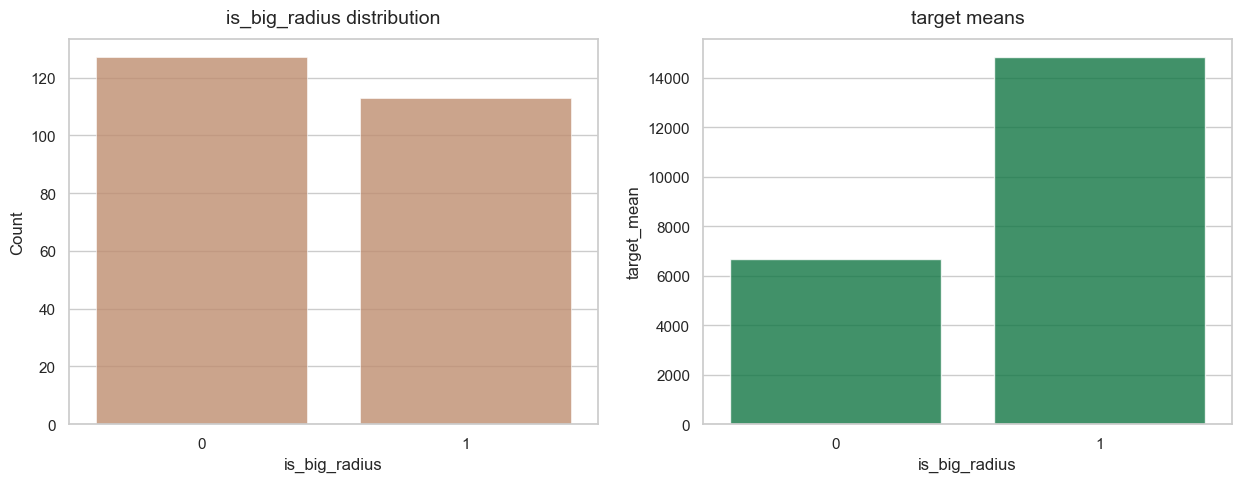

In [24]:
data["is_big_radius"] = data["radius"].apply(
    lambda x: 1 if x > 1 else 0).astype("object")

create_visualization(data=data[["is_big_radius", "temperature"]], dtype="categories",
                     target="temperature", is_cat_target=False, figsize=(15, 5))

Тем не менее, при приведении параметра к бинарному виду, данная прямая связь становиться более отчетливой.

Вероятно, при построении датасета будет приоритетней придать бинарную форму для данного признака.

## magnitude

Visualization of quantitative features distribution:

Feature: magnitude


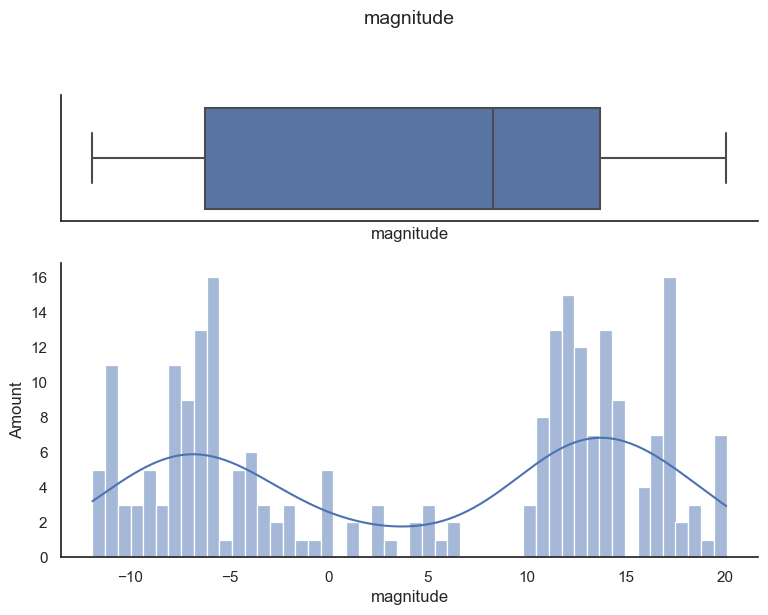


Feature statistics:


,magnitude
count,240.00
mean,4.38
std,10.53
min,-11.92
25%,-6.23
50%,8.31
75%,13.70
max,20.06


In [25]:
create_visualization(data=data[["magnitude", "temperature"]], dtype="scalars",
                     target="temperature", is_cat_target=False, figsize=(9, 6))

Visualization of quantitative features distribution:

Feature: magnitude


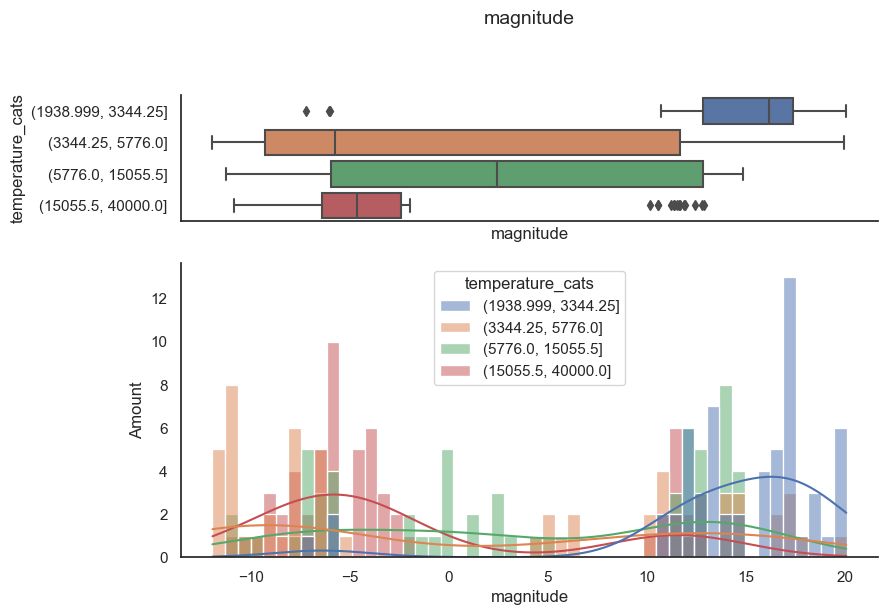


Feature statistics:


,magnitude
count,240.00
mean,4.38
std,10.53
min,-11.92
25%,-6.23
50%,8.31
75%,13.70
max,20.06


In [26]:
create_visualization(data=data[["magnitude", "temperature_cats"]], dtype="scalars",
                     target="temperature_cats", is_cat_target=True, figsize=(9, 6))

Данные магнитуды умещаются в межквартильный размах и демонстрируют отсутсвие выбросов, а также сильные различия в средних значения для разных категорий целевого признака.

## color

Visualization of categorical features and target prevalence:

Feature: color


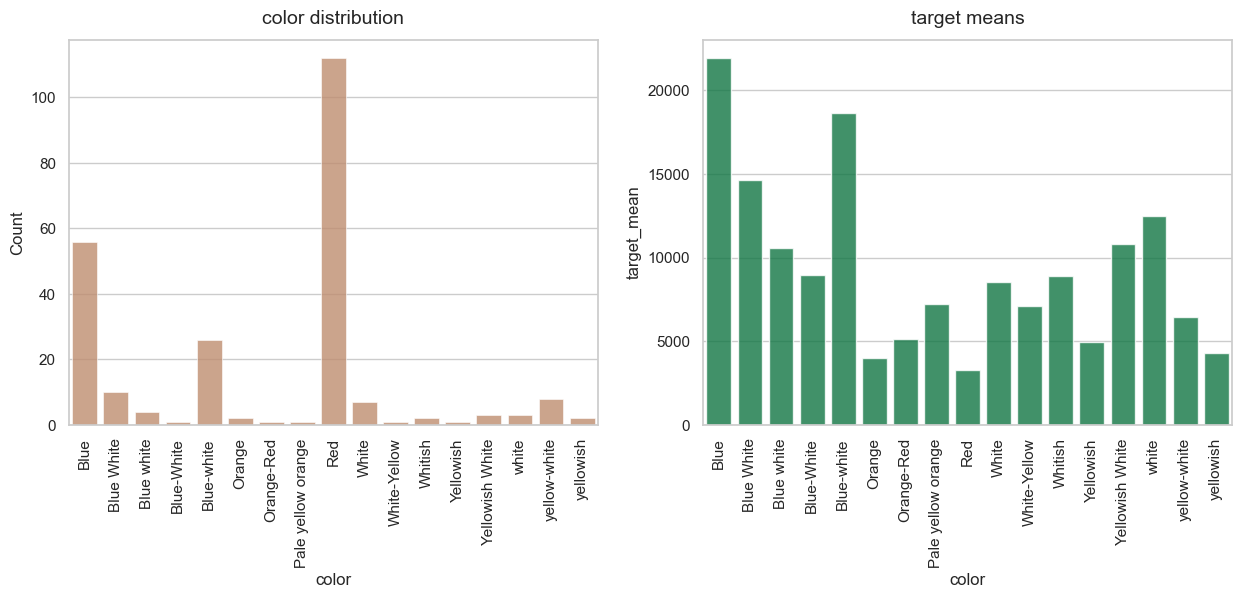

In [27]:
create_visualization(data=data[["color", "temperature"]], dtype="categories",
                     target="temperature", is_cat_target=False, figsize=(15, 5))

Цвет звезды однозначно сильно влияет на её температуру, однако в данных обнаружены следующие ошибки и аномалии:
1. Названия цветов пересекаются или одни и теже названия цветов записаны с ошибками
2. Некоторые категории цветов крайне слабо представлены, что обуславливает их объединение в общие группы или исключение из датасета.

Рассмотрим данный параметр подробнее и обработаем его.

### Анализ параметра в разрезе категорий

Visualization of categorical features and target prevalence:

Feature: color


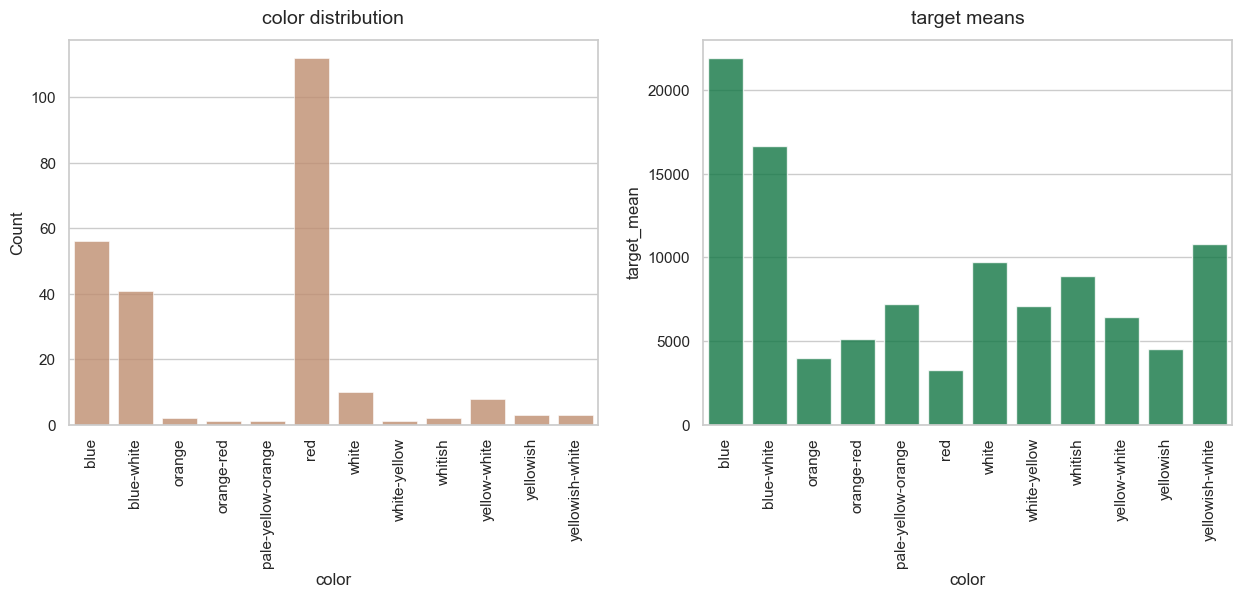

In [28]:
data["color"] = data["color"].apply(lambda x: x.lower().replace(" ", '-'))

create_visualization(data=data[["color", "temperature"]], dtype="categories",
                     target="temperature", is_cat_target=False, figsize=(15, 5))

Сформируем основные группы цветов.

In [29]:
colors = group_colors(data)

RED: 
 ['red', 'orange-red'] 

ORANGE: 
 ['pale-yellow-orange', 'orange'] 

BLUE: 
 ['blue-white', 'blue'] 

WHITE: 
 ['white', 'yellowish-white', 'yellow-white', 'white-yellow'] 

YELLOW: 
 ['yellowish'] 


-------------------------
UNMATCHED COLORS:
['whitish']


In [30]:
colors

{'reds': ['red', 'orange-red'],
 'oranges': ['pale-yellow-orange', 'orange'],
 'blues': ['blue-white', 'blue'],
 'whites': ['white', 'yellowish-white', 'yellow-white', 'white-yellow'],
 'yellows': ['yellowish'],
 'others': ['whitish']}

In [31]:
colors_stat = data["color"].value_counts(normalize=True)
colors_stat

red                   0.466667
blue                  0.233333
blue-white            0.170833
white                 0.041667
yellow-white          0.033333
yellowish-white       0.012500
yellowish             0.012500
whitish               0.008333
orange                0.008333
pale-yellow-orange    0.004167
white-yellow          0.004167
orange-red            0.004167
Name: color, dtype: float64

#### Красные цвета

Visualization of categorical features and target prevalence:

Feature: color


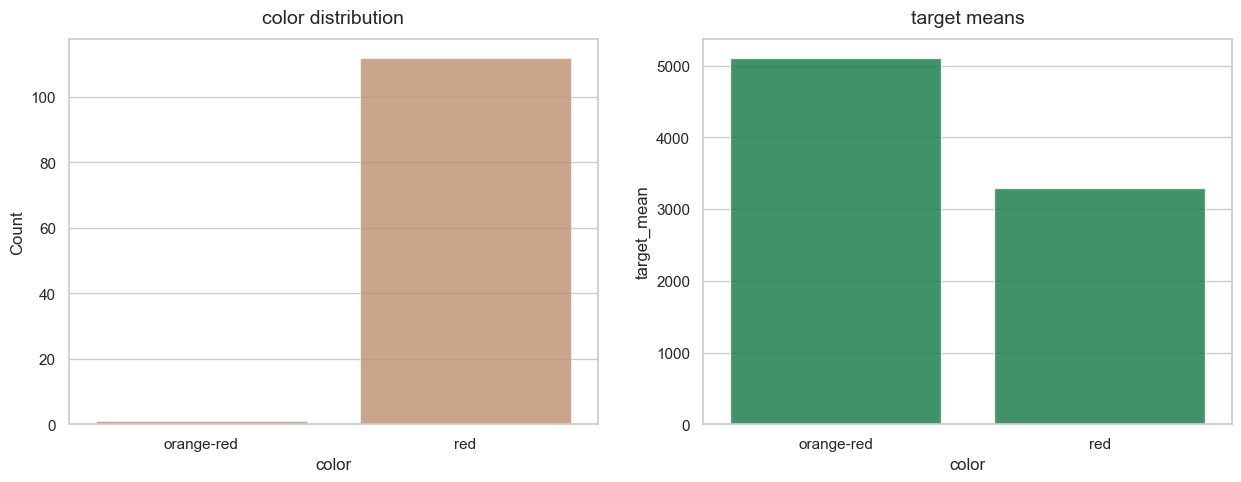

In [32]:
create_visualization(
    data=data[data["color"].isin(colors["reds"])][["color", "temperature"]],
    dtype="categories", target="temperature", is_cat_target=False,
    figsize=(15, 5))

#### Оранжевые цвета

Visualization of categorical features and target prevalence:

Feature: color


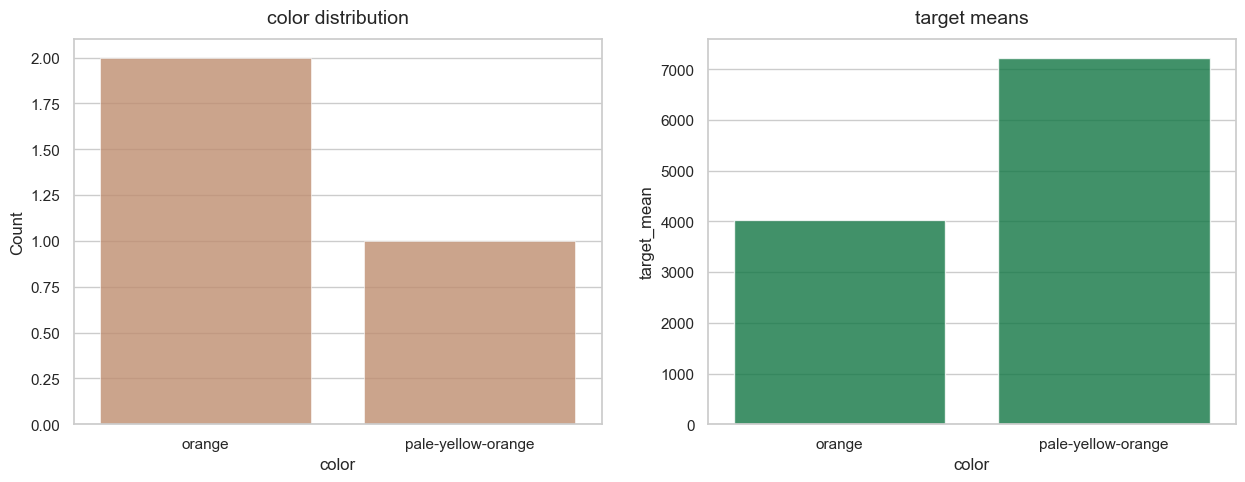

In [33]:
create_visualization(
    data=data[data["color"].isin(colors["oranges"])][["color", "temperature"]],
    dtype="categories", target="temperature", is_cat_target=False,
    figsize=(15, 5))

#### Синие цвета

Visualization of categorical features and target prevalence:

Feature: color


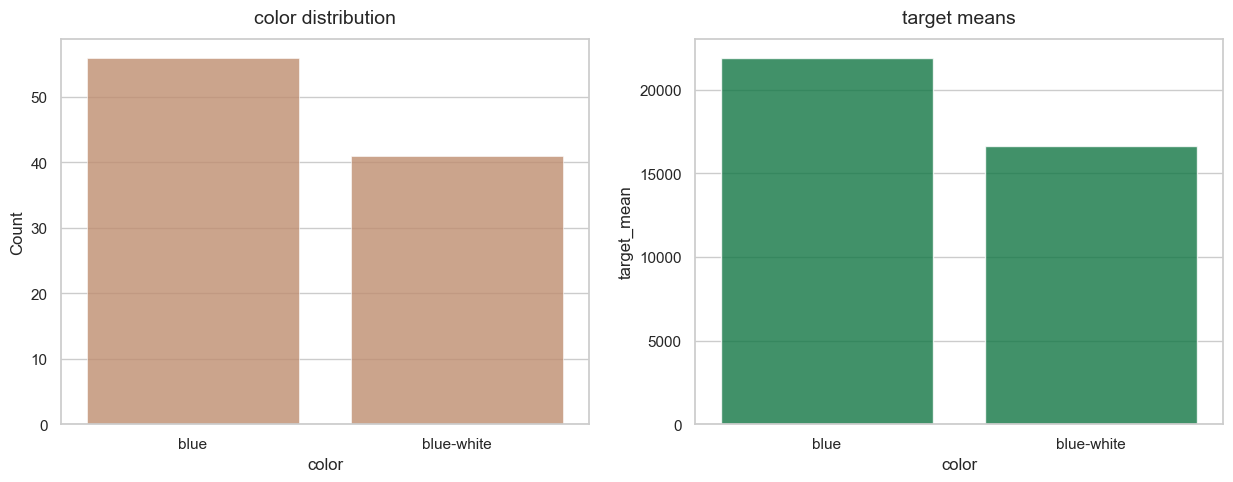

In [34]:
create_visualization(
    data=data[data["color"].isin(colors["blues"])][["color", "temperature"]],
    dtype="categories", target="temperature", is_cat_target=False,
    figsize=(15, 5))

#### Белые цвета

Visualization of categorical features and target prevalence:

Feature: color


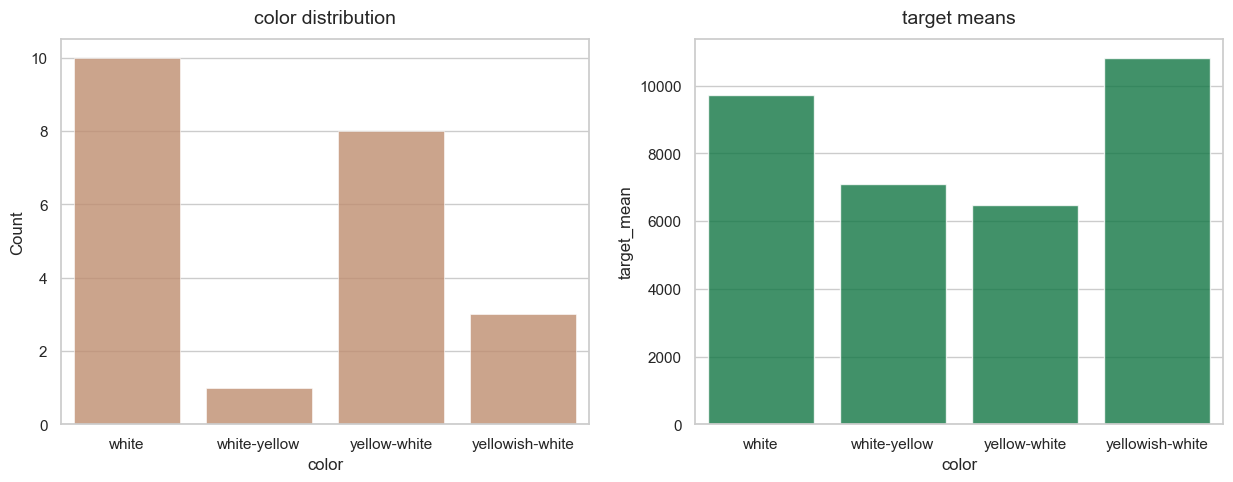

In [35]:
create_visualization(
    data=data[data["color"].isin(colors["whites"])][["color", "temperature"]],
    dtype="categories", target="temperature", is_cat_target=False,
    figsize=(15, 5))

#### Желтые цвета

Visualization of categorical features and target prevalence:

Feature: color


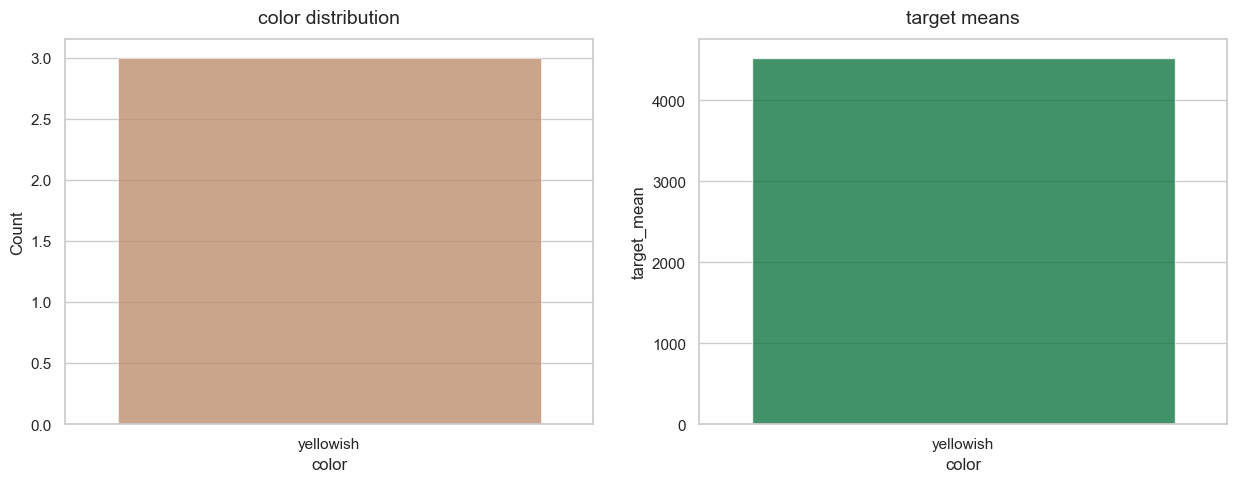

In [36]:
create_visualization(
    data=data[data["color"].isin(colors["yellows"])][["color", "temperature"]],
    dtype="categories", target="temperature", is_cat_target=False,
    figsize=(15, 5))

#### Прочие цвета

Visualization of categorical features and target prevalence:

Feature: color


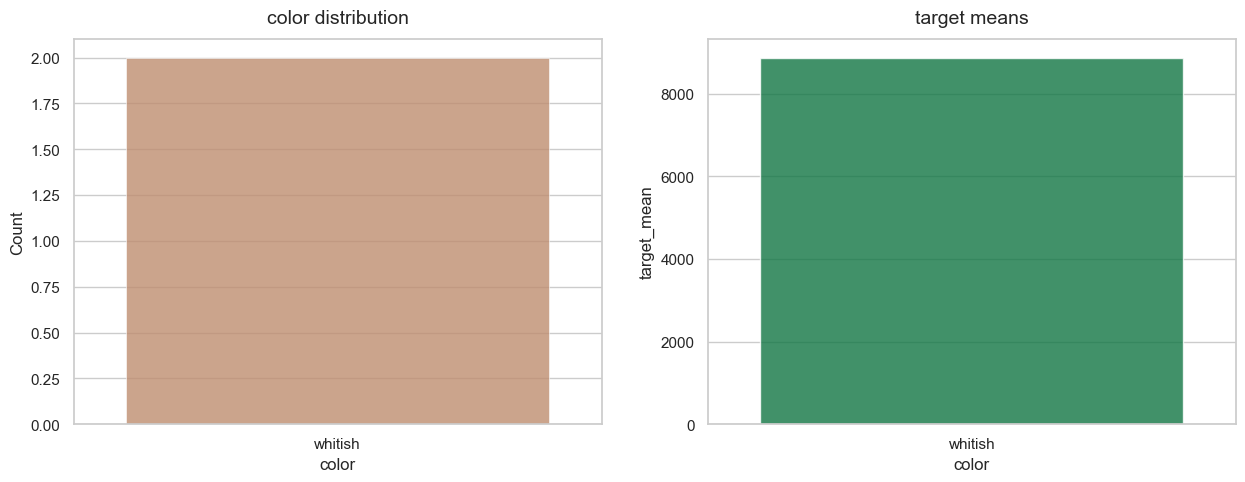

In [37]:
create_visualization(
    data=data[data["color"].isin(colors["others"])][["color", "temperature"]],
    dtype="categories", target="temperature", is_cat_target=False,
    figsize=(15, 5))

### Обработка цветов

Проделанный анализ, позволяет сделать вывод, что ввиду слабой представленности некоторых групп цветов, параметр стоит переработать, объединив данные в самые представленные категории.

In [38]:
main_colors = list(colors_stat[colors_stat > 0.05].index)
main_colors

['red', 'blue', 'blue-white']

Visualization of categorical features and target prevalence:

Feature: color


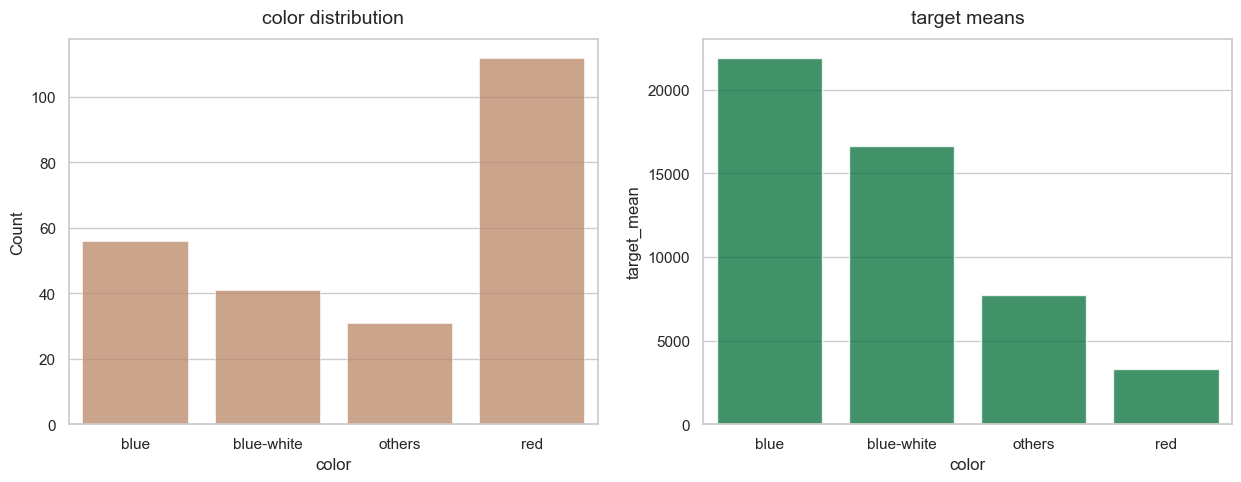

In [39]:
data["color"] = data["color"].apply(
    lambda x: x if x in main_colors else "others")

create_visualization(data=data[["color", "temperature"]], dtype="categories",
                     target="temperature", is_cat_target=False, figsize=(15, 5))

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Визуализация получилась потрясающей:)
</div>


## Корреляционный анализ

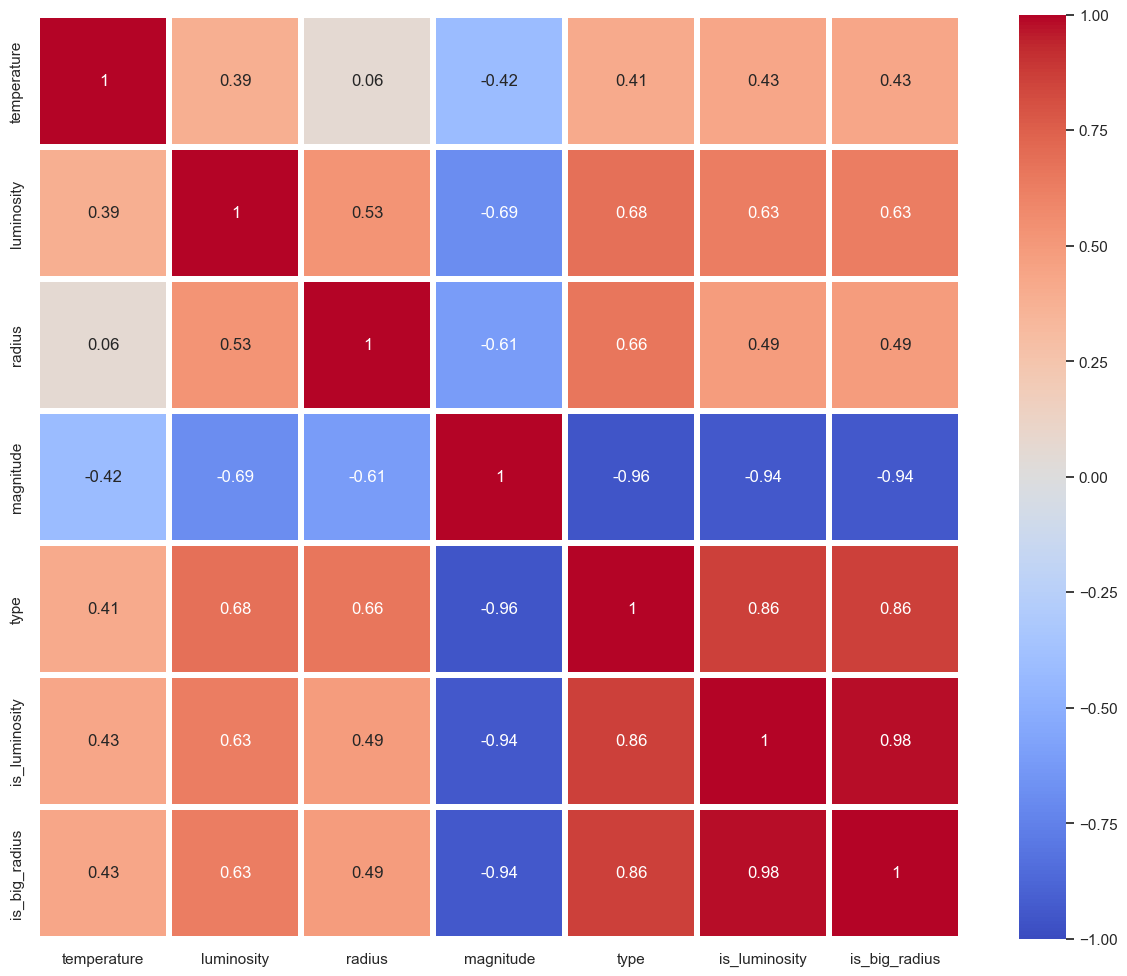

In [40]:
data["is_luminosity"] = data["is_luminosity"].astype("int8")
data["is_big_radius"] = data["is_big_radius"].astype("int8")

get_corr_map(data)

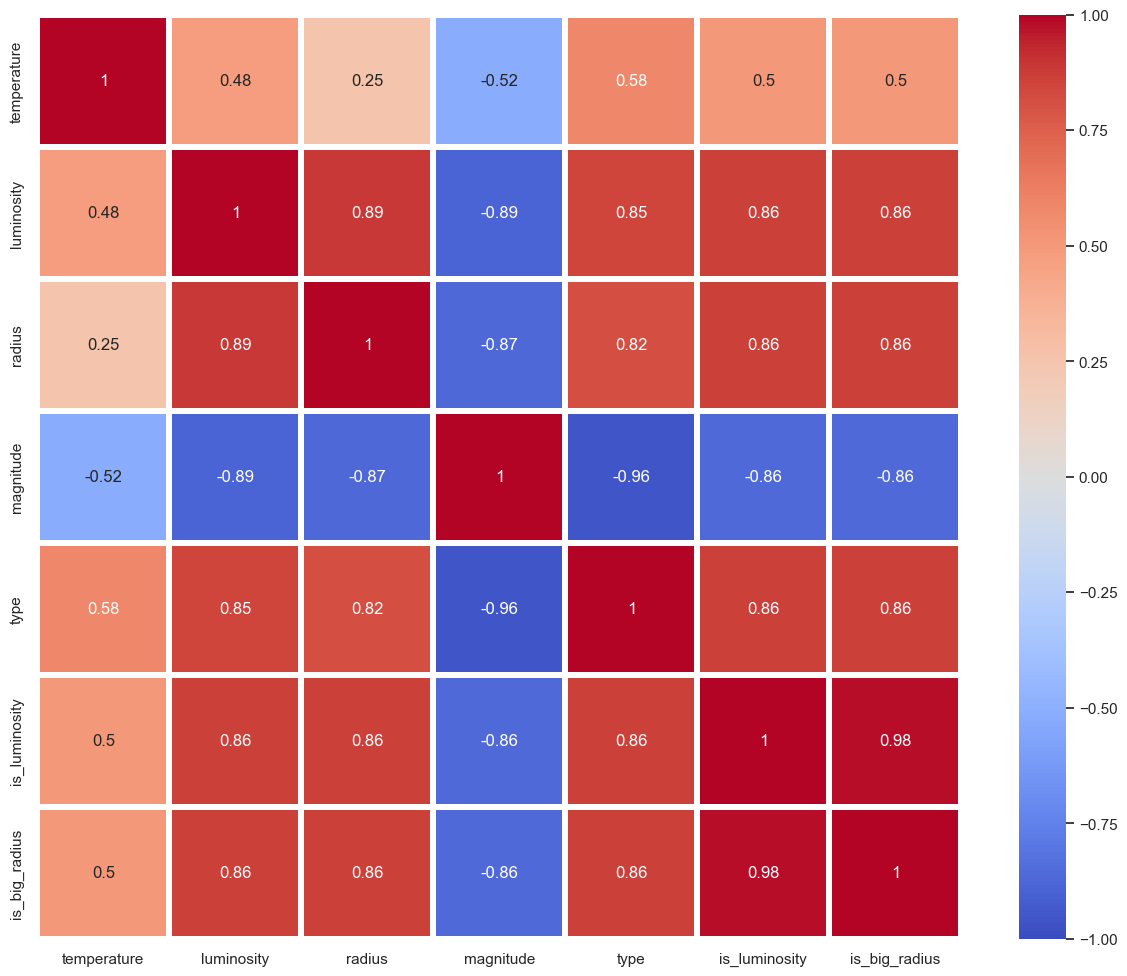

In [41]:
get_corr_map(data, "spearman")

## Сборка датасета

In [42]:
data["temperature"] = remove_outs(data, "temperature")
data["radius"] = remove_outs(data, "radius")
data["luminosity"] = remove_outs(data, "luminosity")


ds = pd.DataFrame(
    {
        # Categorical features
        "c_color":          data["color"],
        "c_type":           data["type"].astype("object"),

        # Quantitative features
        "q_luminosity":     data["luminosity"],#.apply(lambda x: 0 if x < 1 else x),
        # "q_radius":         data["radius"],#.apply(lambda x: 0 if x < 1 else x),
        "q_magnitude":      data["magnitude"],

        # Binary features
        "b_big_radius":     data["is_big_radius"],

        # Target
        "target":           data["temperature"]
    }
).reset_index(drop=True)


print("Dataset assembled.")
print()

print("Nulls values in data was dropped:           ", ds.isna().sum().sum())
ds = ds.dropna().reset_index(drop=True)

print()
print("Duplicates in data:                         ", ds.duplicated().sum())
ds = ds.drop_duplicates().reset_index(drop=True)
print("Duplicates in data after processing:        ", ds.duplicated().sum())
print()

cat_features = []
for i in ds.columns:
    if not pd.isna(re.search("^c.*", i)):
        cat_features.append(i)

q_features = list(ds.drop(cat_features, axis=1).columns)[0:-1]

print("DS shape:                                   ", ds.shape)
print("The amount of observations has decreased by:",
      f"{100 - round(ds.shape[0] / data.shape[0] * 100, 2)}%")
print()
print("Cat features:")
print(cat_features)
print()
print("Quantitative features:")
print(q_features)
print()
print("Dataset sample:")
ds.head()

Dataset assembled.

Nulls values in data was dropped:            23

Duplicates in data:                          0
Duplicates in data after processing:         0

DS shape:                                    (218, 6)
The amount of observations has decreased by: 9.170000000000002%

Cat features:
['c_color', 'c_type']

Quantitative features:
['q_luminosity', 'q_magnitude', 'b_big_radius']

Dataset sample:


,c_color,c_type,q_luminosity,q_magnitude,b_big_radius,target
0,red,0,0.002400,16.125000,0,3068.0
1,red,0,0.000500,16.593750,0,3042.0
2,red,0,0.000300,18.703125,0,2600.0
3,red,0,0.000200,16.656250,0,2800.0
4,red,0,0.000138,20.062500,0,1939.0


In [43]:
df_quik_view(ds)

General data analysis:

Shape of the table:      (218, 6)
Duplicates in the table: 0, (0.0%)
Memory usage:            0.0+ MB



,values_num,nulls_num,completeness,uniques_num,unique_values,dtype
c_color,218,0,100.0,4,"[red, others, blue-white, blue]",object
c_type,218,0,100.0,6,"[5, 4, 3, 2, 1, 0]",object
q_luminosity,218,0,100.0,188,"[452000.0, 424520.0, 404940.0, 382993.0, 36300...",float32
q_magnitude,218,0,100.0,205,"[20.06, 20.02, 19.94, 19.62, 19.56, 19.45, 19....",float16
b_big_radius,218,0,100.0,2,"[1, 0]",int8
target,218,0,100.0,206,"[32460.0, 30000.0, 29560.0, 28700.0, 26373.0, ...",float64


## Формирование выборок

In [44]:
X = ds.drop("target", axis=1)
y = ds["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, test_size=TEST_SIZE, random_state=RANDOM_STATE)

print("Sampling was successful!")
print("\n")
print("The shape of the training set for features: ",
      X_train.shape)
print("The shape of the training set for target:   ",
      y_train.shape)
print()
print("The shape of the test set for features:     ",
      X_test.shape)
print("The shape of the test set for target:       ",
      y_test.shape)

Sampling was successful!


The shape of the training set for features:  (174, 5)
The shape of the training set for target:    (174,)

The shape of the test set for features:      (44, 5)
The shape of the test set for target:        (44,)


### Нормлизация выборок

In [45]:
scaler = SCALER.fit(X_train[q_features])

X_train[q_features] = scaler.transform(X_train[q_features])
X_test[q_features] = scaler.transform(X_test[q_features])

print("Train sample:")
display(X_train.sample(3))
print()
print("Test sample:")
display(X_test.sample(3))

Train sample:


,c_color,c_type,q_luminosity,q_magnitude,b_big_radius
149,blue-white,3,3.420334e-02,0.253908,1.0
57,red,0,1.300292e-08,0.880313,0.0
43,red,4,6.595684e-01,0.185149,1.0



Test sample:


,c_color,c_type,q_luminosity,q_magnitude,b_big_radius
152,blue,4,5.252991e-01,0.187592,1.0
177,red,0,8.974841e-10,0.918417,0.0
178,red,0,1.109488e-09,0.893991,0.0


### OHE

In [46]:
ohe = OHE.fit(X_train[cat_features])

X_train_ohe = ohe.transform(X_train[cat_features]).toarray()
X_test_ohe = ohe.transform(X_test[cat_features]).toarray()

X_train = np.concatenate([X_train_ohe, X_train[q_features]], axis=1)
X_test = np.concatenate([X_test_ohe, X_test[q_features]], axis=1)

print('Train shape:     ', X_train.shape)
print()
print('Validation shape:', X_test.shape)

Train shape:      (174, 11)

Validation shape: (44, 11)


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, хорошо, можно еще через ColumnTransformer:



```python
    from sklearn.compose import ColumnTransformer
    numeric = <your code>
    categorical = <your code>
    col_transformer = ColumnTransformer(
                            transformers=[
                                ('scaler', StandardScaler(), numeric),
                                ('ohe', OneHotEncoder(sparse=False, drop='first'), categorical)],
                                    remainder="passthrough"
                                      )

    X_train = col_transformer.fit_transform(X_train)
    X_test = col_transformer.transform(X_test)
```
+  https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
+  https://towardsdatascience.com/using-columntransformer-to-combine-data-processing-steps-af383f7d5260
+  https://medium.com/analytics-vidhya/handling-heterogeneous-features-in-a-dataset-using-columntransformer-aa525ebe0486 

</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо за комментарий и полезные статьи!
</div>

### Перевод данных в формат тензеров

In [47]:
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train.values)

X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test.values)

print("Train sample tensor:")
print(X_train[:3, :])
print(y_train[:3])
print()
print("Test sample tensor:")
print(X_test[:3, :])
print(y_test[:3])

Train sample tensor:
tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.5547e-09, 7.2252e-01, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
         0.0000e+00, 0.0000e+00, 1.6230e-03, 3.7337e-01, 1.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 5.3943e-01, 5.7890e-02, 1.0000e+00]])
tensor([10980., 12098.,  6850.])

Test sample tensor:
tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.0000e+00, 0.0000e+00, 8.5508e-01, 1.9052e-01, 1.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.0000e+00, 0.0000e+00, 8.1933e-01, 1.8808e-01, 1.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.4840e-09, 7.7382e-01, 0.0000e+00]])
tensor([24630., 2

# Построение модели нейронной сети

## Класс Baseline-модели

In [48]:
class CustomEarlyStopping():
    """
    Early stopping to stop the training when the loss does not improve after
    certain epochs.
    """
    def __init__(self, patience=5, min_delta=0):
        """
        :param patience: how many epochs to wait before stopping when loss is
               not improving
        :param min_delta: minimum difference between new loss and old loss for
               new loss to be considered as an improvement
        """
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            # reset counter if validation loss improves
            self.counter = 0
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            print(f"INFO: Early stopping counter {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                print('INFO: Early stopping')
                self.early_stop = True

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавлен класс CustomEarlyStopping
</div>

In [49]:
class BaselineNet(nn.Module):
    def __init__(self, n_in, n_2, n_3, n_4, n_out,
                 act1, act2, act3,
                 learning_rate=0.01):
        super(BaselineNet, self).__init__()

        self.fc1 = nn.Linear(n_in, n_2)
        self.a1 = act1

        self.fc2 = nn.Linear(n_2, n_3)
        self.a2 = act2

        self.fc3 = nn.Linear(n_3, n_4)
        self.a3 = act3

        self.fc4 = nn.Linear(n_4, n_out)


        self.learning_rate = learning_rate
        self.init_weights()

    def init_weights(m):
        if isinstance(m, nn.Linear):
            torch.nn.init.kaiming_normal_(m.weight)
            m.bias.data.fill_(0.01)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)

        return x.flatten()
    
    def fit(self, X_train, y_train, eval_set=None, num_epochs=10, batch_size=None,
            early_stopping_rounds=None, verbose=True, verbose_eval=1,
            plot=True):
        if batch_size is None:
            batch_size = X_train.size()[0]
        train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
        train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                   batch_size=batch_size,
                                                   shuffle=True)
        eval_loader = None
        if eval_set is not None:
            X_eval, y_eval = eval_set
            eval_dataset = torch.utils.data.TensorDataset(X_eval, y_eval)
            eval_loader = torch.utils.data.DataLoader(dataset=eval_dataset,
                                                    batch_size=batch_size,
                                                    shuffle=False)

            
        criterion = nn.MSELoss()
        optimizer = optim.Adam(self.parameters(), lr=self.learning_rate)

        early_stopping = CustomEarlyStopping(patience=early_stopping_rounds,
                                             min_delta=1)
        if plot:
            from torch.utils.tensorboard import SummaryWriter
            %load_ext tensorboard
            writer_train = SummaryWriter(log_dir='./runs/train')
            writer_test = SummaryWriter(log_dir='./runs/test')
        for epoch in range(num_epochs):
            train_predict, train_true = [], []
            eval_predict, eval_true = [], []

            for batch, (inputs, labels) in enumerate(train_loader):

                outputs = self.forward(inputs)
                loss = criterion(outputs, labels)
                    
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                train_predict.append(outputs)
                train_true.append(labels)

                if eval_loader is not None:
                    with torch.no_grad():
                        for eval_inputs, eval_labels in eval_loader:
                            eval_outputs = self.forward(eval_inputs)

                            eval_predict.append(eval_outputs)
                            eval_true.append(eval_labels)

            train_predict = torch.cat(train_predict).detach().numpy()
            train_true = torch.cat(train_true).detach().numpy()
            
            eval_predict = torch.cat(eval_predict).detach().numpy()
            eval_true = torch.cat(eval_true).detach().numpy()

            train_rmse = mean_squared_error(train_predict, train_true, squared=False)
            eval_rmse = mean_squared_error(eval_predict, eval_true, squared=False)

            if plot:
                writer_train.add_scalar('RMSE', train_rmse, epoch)
                if eval_set is not None:
                    writer_test.add_scalar('RMSE', eval_rmse, epoch)
            if verbose and epoch % verbose_eval == 0:
                print("------------------------------------------")
                print ("Epoch [{}/{}], train RMSE: {:.4f}, RMSE: {:.4f})"
                       .format(epoch+1, num_epochs, train_rmse, eval_rmse))
                print()
            
            early_stopping(eval_rmse if eval_set is not None else train_rmse)
            if early_stopping.early_stop:
                print('Early Stoppning!!!')
                break
        if plot:
            %tensorboard --logdir=runs
            writer_test.close()
            writer_train.close()

    def predict(self, X):
        self.eval()
        with torch.no_grad():
            output = self.forward(X)
            return output

 <div class="alert alert-warning">
<b>Комментарий ревьюера V2⚠️:</b> 
    
    
```python
    
from sklearn.metrics import mean_squared_error

class BaselineNet(nn.Module):
    def __init__(self, n_in, n_2, n_3, n_4, n_out,
                 act1, act2, act3,
                 learning_rate=0.001):
        super(BaselineNet, self).__init__()

        self.fc1 = nn.Linear(n_in, n_2)
        self.a1 = act1

        self.fc2 = nn.Linear(n_2, n_3)
        self.a2 = act2

        self.fc3 = nn.Linear(n_3, n_4)
        self.a3 = act3

        self.fc4 = nn.Linear(n_4, n_out)
        # self.a4 = nn.ReLU() # для предотвращения отрицательных значений


        self.learning_rate = learning_rate
        self.init_weights()

    def init_weights(m):
        if isinstance(m, nn.Linear):
            torch.nn.init.kaiming_normal_(m.weight)
            m.bias.data.fill_(0.01)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)

        return x.flatten()
    
    def fit(self, X_train, y_train, eval_set=None, num_epochs=10, batch_size=None,
            early_stopping_rounds=None, verbose=True, verbose_eval=1,
            plot=True):
        if batch_size is None:
            batch_size = X_train.size()[0]
        train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
        train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                                   batch_size=batch_size,
                                                   shuffle=True)
        eval_loader = None
        if eval_set is not None:
            X_eval, y_eval = eval_set
            eval_dataset = torch.utils.data.TensorDataset(X_eval, y_eval)
            eval_loader = torch.utils.data.DataLoader(dataset=eval_dataset,
                                                    batch_size=batch_size,
                                                    shuffle=False)

            
        criterion = nn.MSELoss()
        optimizer = optim.Adam(self.parameters(), lr=self.learning_rate)

        early_stopping = CustomEarlyStopping(patience=early_stopping_rounds,
                                             min_delta=1)
        if plot:
            from torch.utils.tensorboard import SummaryWriter
            writer_train = SummaryWriter(log_dir='Train')
            writer_test = SummaryWriter(log_dir='Test')
            %load_ext tensorboard
        for epoch in range(num_epochs):
            train_predict, train_true = [], []
            eval_predict, eval_true = [], []
            
            for batch, (inputs, labels) in enumerate(train_loader):
                

                outputs = self.forward(inputs)
                loss = criterion(outputs, labels)
                    
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
                train_predict.append(outputs)
                train_true.append(labels)

                if eval_loader is not None:
                    with torch.no_grad():
                        for eval_inputs, eval_labels in eval_loader:
                            eval_outputs = self.forward(eval_inputs)
                            eval_predict.append(eval_outputs)
                            eval_true.append(eval_labels)
            
            train_predict = torch.cat(train_predict).detach().numpy()
            train_true = torch.cat(train_true).detach().numpy()
            
            eval_predict = torch.cat(eval_predict).detach().numpy()
            eval_true = torch.cat(eval_true).detach().numpy()

            eval_rmse = mean_squared_error(eval_predict, eval_true, squared=False)
            train_rmse = mean_squared_error(train_predict, train_true, squared=False)

            if plot:
                writer_train.add_scalar('Loss', train_loss, epoch)
                writer_train.add_scalar('RMSE', train_rmse, epoch)
                if eval_set is not None:
                    writer_test.add_scalar('Loss', eval_loss, epoch)
                    writer_test.add_scalar('RMSE', eval_rmse, epoch)
            if verbose and epoch % verbose_eval == 0:
                print("------------------------------------------")
                print ("Epoch [{}/{}], train RMSE: {:.4f}, RMSE: {:.4f})"
                       .format(epoch+1, num_epochs, train_rmse, eval_rmse))
                print()
            
            early_stopping(eval_rmse if eval_set is not None else train_rmse)
            if early_stopping.early_stop:
                print('Early Stoppning!!!')
                break
        if plot:
            %tensorboard --logdir=runs
            writer_test.close()
            writer_train.close()

    def predict(self, X):
        self.eval()
        with torch.no_grad():
            output = self.forward(X)
            return output
            
```

    
+  learning rate лучше брать 1e-3 (подправил)
+  Переписал подсчет метрик, лучше всего сохранять предсказания и истинные label и уже потом считать RMSE на всей обучающей/валидационной выборке 
    
+  И убрать reshape (не понял для чего он)
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Значительно переработан класс модели: изменены гиперпараметры, изменен метод fit (добавлена возможность указания тестового сета для исключения переобучения, добавлен tensorboard, добавлен early_stopping)
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> 
    
Необходимо сгладить выход используя flatten(). Модель сейчас возвращает `[[0], [1], [2]]`, а нам необходимо `[0, 1, 2]`, поэтому
`test_preds = model.flatten()` 
    
Чтобы не подбирать кол-во эпох, можно воспользоваться EarlyStopping:
                
+  https://debuggercafe.com/using-learning-rate-scheduler-and-early-stopping-with-pytorch/    
    
 </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо за комментарий! Дополнил модель.
</div>

## Инициализация Baseline-модели

In [50]:
print("Baseline model initialization")
print()

n_in = X_train.size()[1]
n_2 = int(np.ceil(((n_in * 5) ** 0.5)))
n_3 = int(np.ceil((n_2 * 2) ** 0.5))
n_4 = int(np.ceil((n_3 * 1) ** 0.5))
n_out = 1

print("Layers & neurons:")
print("Input neurons:            ", n_in)
print("Hidden neurons in 1 Layer:", n_2)
print("Hidden neurons in 2 Layer:", n_3)
print("Hidden neurons in 3 Layer:", n_4)
print("Out neurons:              ", n_out)
print()


act1, act2, act3 = nn.LeakyReLU(), nn.LeakyReLU(), nn.LeakyReLU()

baseline_model = BaselineNet(n_in, n_2, n_3, n_4, n_out,
                             act1, act2, act3)


print("Model initialized.")
print()
print("Model's parameters:")
print(baseline_model.state_dict())

Baseline model initialization

Layers & neurons:
Input neurons:             11
Hidden neurons in 1 Layer: 8
Hidden neurons in 2 Layer: 4
Hidden neurons in 3 Layer: 2
Out neurons:               1

Model initialized.

Model's parameters:
OrderedDict([('fc1.weight', tensor([[ 0.2305,  0.2503, -0.0706,  0.2770, -0.0661,  0.0608, -0.1468,  0.1771,
          0.2658, -0.2212,  0.2621],
        [ 0.0564,  0.2228,  0.0408,  0.1454, -0.0426,  0.2324,  0.0446, -0.1408,
          0.0769, -0.1389, -0.0354],
        [-0.1225,  0.2000, -0.2380, -0.1390, -0.0851, -0.1813,  0.0285, -0.2978,
          0.2723, -0.2561,  0.2328],
        [ 0.0502, -0.0979,  0.1863,  0.0470,  0.2436,  0.0330, -0.0951,  0.0810,
         -0.0818,  0.1269,  0.2692],
        [ 0.1743, -0.1318,  0.1741,  0.0539,  0.1531, -0.1838, -0.2985, -0.1165,
         -0.2313,  0.2474,  0.0868],
        [ 0.1249,  0.0954, -0.0052,  0.2360, -0.2142,  0.0190, -0.2058,  0.0930,
         -0.1038,  0.0924, -0.0628],
        [ 0.2501, -0.1787, -

## Обучение Baseline-модели

In [51]:
baseline_model = train_model(
    model=baseline_model, X_train=X_train, y_train=y_train,
    eval_set=(X_test, y_test), num_epochs=500, butch_size=50,
    early_stopping_rounds=20, verbose_eval=5, plot=True)

The model started training at 1681030267.9720008

------------------------------------------
Epoch [1/500], train RMSE: 10938.9180, RMSE: 13507.8662)

INFO: Early stopping counter 1 of 20
INFO: Early stopping counter 2 of 20
INFO: Early stopping counter 3 of 20
------------------------------------------
Epoch [6/500], train RMSE: 10937.0391, RMSE: 13505.6621)

INFO: Early stopping counter 1 of 20
------------------------------------------
Epoch [11/500], train RMSE: 10919.7471, RMSE: 13485.3066)

------------------------------------------
Epoch [16/500], train RMSE: 10823.8643, RMSE: 13375.5752)

------------------------------------------
Epoch [21/500], train RMSE: 10484.1465, RMSE: 12997.4131)

------------------------------------------
Epoch [26/500], train RMSE: 9642.7568, RMSE: 12056.3486)

------------------------------------------
Epoch [31/500], train RMSE: 8189.2236, RMSE: 10357.5498)

------------------------------------------
Epoch [36/500], train RMSE: 6854.0879, RMSE: 8441



Training completed.
Studying time: 00:00:02


<div class="alert alert-info"> <b>Комментарий студента:</b> Прошу прощения за некорректное отображение графиков - ещё не до конца разобрался в особенностях этой библиотеки.
</div>

## Результат Baseline-модели

In [52]:
preds = baseline_model.predict(X_test)
baseline_val_ds = pd.DataFrame(
    {
        "real_target":          y_test,
        "predicted_target":     preds.numpy(),
        "error":                y_test - preds.numpy()
    }
)
baseline_val_ds

,real_target,predicted_target,error
0,24630.0,14925.342773,9704.657227
1,23095.0,14779.218750,8315.781250
2,12912.0,17678.990234,-4766.990234
3,3484.0,2112.900879,1371.099121
4,3340.0,3312.638916,27.361084
5,12675.0,15756.083984,-3081.083984
6,24490.0,13802.518555,10687.481445
7,2890.0,3353.073730,-463.073730
8,19400.0,15991.551758,3408.448242
9,14732.0,9853.416016,4878.583984


<div class="alert alert-danger">
<b>Комментарий ревьюера V2❌:</b> 
    
Все из за `[:][0]`, ты берешь самое первое предсказание и оно копирается на все строчки...убери его просто и все наладится
 </div>

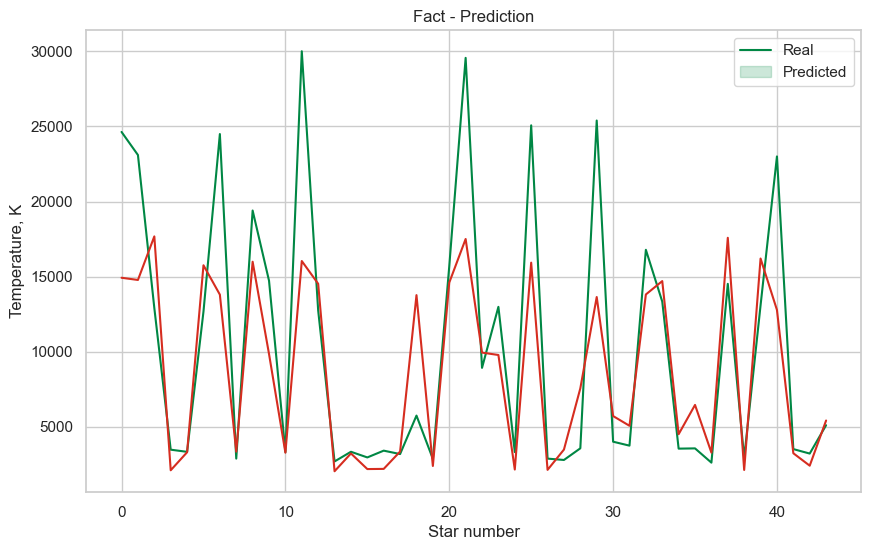

RMSE: 5134.609624888732
R2  : 0.6504784409626523


In [53]:
check_preds(baseline_val_ds)
print("RMSE:", mean_squared_error(y_test, preds)**0.5)
print("R2  :", r2_score(y_test, preds))

<div class="alert alert-info"> <b>Комментарий студента:</b> Почему выходит настолько прямая линия у предсказаний? Подскажи как это можно интерпретировать?)
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера V2❌:</b> 
    
Смотри метрика RMSE 5139 значит модель обучилась...но почему прямая линиия, если модель работает корректно. Все дело как раз было в `[:][0]`
 </div>

Исходя из предоставленных результатов RMSE и R2, можно сделать вывод, что Baseline-модель нейросети достаточно хорошо справляется с тестовой выборкой. Значение RMSE говорит о том, что среднеквадратическое отклонение прогнозов модели от фактических значений составляет 5134 единиц, что является довольно неплохим результатом для данной задачи. Значение R2 в 0.65 говорит о том, что модель объясняет 65% дисперсии целевой переменной, что также можно считать хорошим показателем для Baseline-модели.

Для дальнейшего улучшения модели необходимо провести тщательный перебор гиперпараметров, таких как количество нейронов в каждом слое, скорость обучения и другие. Это может помочь улучшить результаты модели и уменьшить среднеквадратическое отклонение прогнозов.

Кроме того, добавление дропаута и батч-нормализации может помочь снизить переобучение модели и повысить её обобщающую способность. Дропаут является эффективным методом регуляризации, который позволяет избежать переобучения, а батч-нормализация может ускорить обучение и улучшить стабильность модели.

## Улучшение модели

Создадим дочерний класс `ImprovedNet` для `BaselineNet` с добавлением вероятеости dropout для каждого слоя, а также батч-нормализации.

Повторно обучим модель и сравним результаты.

## Класс улучшенной модели

In [54]:
class ImprovedNet(BaselineNet):
    def __init__(self, n_in, n_2, n_3, n_4, n_out,
                 act1, act2, act3,
                 p1, p2, p3,
                 learning_rate=0.01):
        super(ImprovedNet, self).__init__(n_in, n_2, n_3, n_4, n_out,
                                          act1=act1, act2=act2, act3=act3,
                                          learning_rate=learning_rate)
        self.act1 = act1
        self.act2 = act2
        self.act3 = act3
        
        self.do1 = nn.Dropout(p1)
        self.do2 = nn.Dropout(p2)
        self.do3 = nn.Dropout(p3)

        self.bn1 = nn.BatchNorm1d(n_2)
        self.bn2 = nn.BatchNorm1d(n_3)
        self.bn3 = nn.BatchNorm1d(n_4)

    def forward(self, x):
        x = self.act1(self.bn1(self.fc1(x)))
        x = self.do1(x)

        x = self.act2(self.bn2(self.fc2(x)))
        x = self.do2(x)

        x = self.act3(self.bn3(self.fc3(x)))
        x = self.do3(x)

        x = self.fc4(x)
        
        return x.flatten()

<div class="alert alert-danger">
<b>Комментарий ревьюера V2❌:</b> 
    
Необходимо сгладить выход используя flatten(). Модель сейчас возвращает `[[0], [1], [2]]`, а нам необходимо `[0, 1, 2]`, поэтому
`test_preds = model.flatten()` 
       
    
 </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Обновлен класс улучшенной модели
</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> 
    
Зачем, увеличиваем кол-во нейронов в два раза для BatchNorm1d?
    
 </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Не очень разобрался в чем смысл параметра

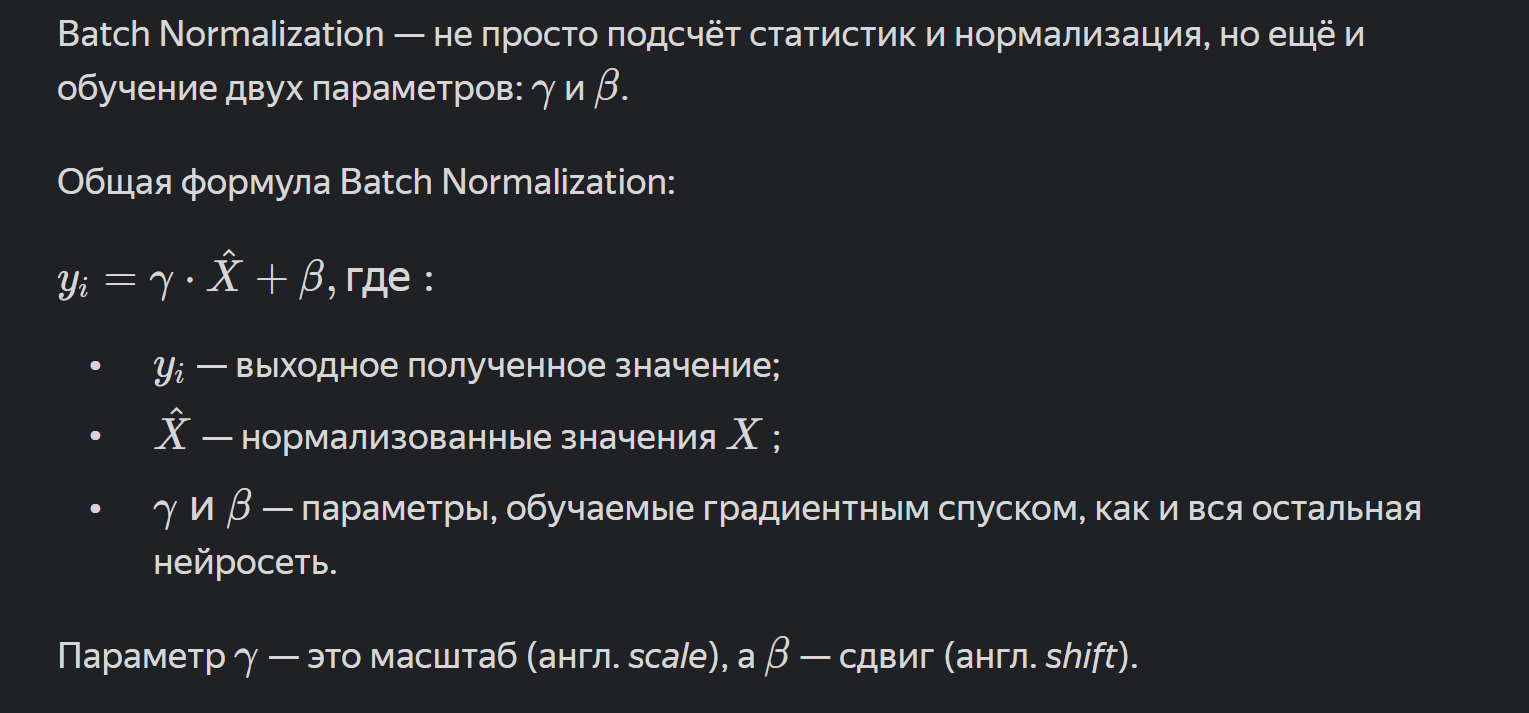

Я понял так, что нужно увеличивать количество нейронов на 2.
</div>

## Подбор гиперпараметров

Для подбора гиперпараметров воспользуемся библиотекой `Optuna`.

In [55]:
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

rmse_scorer = make_scorer(rmse)


def objective(trial):
    
    #dropout
    p1 = trial.suggest_float('module__p1', 0.0, 0.3, step=0.1) 
    p2 = trial.suggest_float('module__p2', 0.0, 0.3, step=0.1) 
    p3 = trial.suggest_float('module__p3', 0.0, 0.3, step=0.1)

    # activation
    activation_dict = {"nn.LeakyReLU()": nn.LeakyReLU(),
                       "nn.ReLU()": nn.ReLU(),
                       "nn.ELU()": nn.ELU()
                      }
    
    act1 = trial.suggest_categorical('module__activation1', ["nn.LeakyReLU()", "nn.ReLU()", "nn.ELU()"])
    act2 = trial.suggest_categorical('module__activation2', ["nn.LeakyReLU()", "nn.ReLU()", "nn.ELU()"])
    act3 = trial.suggest_categorical('module__activation3', ["nn.LeakyReLU()", "nn.ReLU()", "nn.ELU()"])
    
    act1 = activation_dict.get(act1)
    act2 = activation_dict.get(act2)
    act3 = activation_dict.get(act3)

    #number of neuros
    n_in, n_out = X_train.shape[-1], 1
    
    n_2 = trial.suggest_int('module__n_2', 5, 100,  step=5)
    n_3 = trial.suggest_int('module__n_3', 5, 100,  step=5)
    n_4 = trial.suggest_int('module__n_4', 5, 100,  step=5)
    
    #learning rate
    lr = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
    
    #batch size 
    batch_size = trial.suggest_int('batch_size', 10, 100,  step=10)
    
    model_base = ImprovedNet(n_in=n_in, n_2=n_2, n_3=n_3, n_4=n_4, n_out=n_out, 
                             act1=act1,
                             act2=act2,
                             act3=act3,
                             p1=p1, p2=p2, p3=p3,
                             learning_rate=lr)
    
    patience = trial.suggest_int('patience', 30, 60,  step=5)
    
    skorch_regressor = NeuralNetRegressor(module=model_base, 
                                      device='cpu',  
                                      verbose=0,
                                      batch_size=batch_size,
                                      optimizer=torch.optim.Adam, 
                                      max_epochs=2500, 
                                      lr=lr,
                                      train_split=ValidSplit(cv=5),
                                      criterion =nn.MSELoss,
                                      callbacks=[
                ('val_rmse', EpochScoring(scoring=rmse_scorer, lower_is_better=True, name='RMSE')),
                ('estoper', EarlyStopping( lower_is_better=True, monitor='RMSE', patience=patience)),
            ],
                                     )

    rmse = cross_val_score(skorch_regressor, X_train.numpy().astype('float32'), 
                            y_train.numpy().astype('float32').reshape(-1,1), 
                            cv=2,
                           scoring=rmse_scorer)
    rmse = abs(rmse.mean())
    return rmse

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавлен подбор параметров
</div>

In [56]:
start = time.time()

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

end = time.time()
exec_time(start, end)

[I 2023-04-09 11:51:10,990] A new study created in memory with name: no-name-815aa665-4498-4740-a40b-3da04d9754ce
[I 2023-04-09 11:51:36,656] Trial 0 finished with value: 7092.867919921875 and parameters: {'module__p1': 0.3, 'module__p2': 0.0, 'module__p3': 0.1, 'module__activation1': 'nn.LeakyReLU()', 'module__activation2': 'nn.ReLU()', 'module__activation3': 'nn.ELU()', 'module__n_2': 70, 'module__n_3': 20, 'module__n_4': 50, 'learning_rate': 0.007074166090331241, 'batch_size': 70, 'patience': 45}. Best is trial 0 with value: 7092.867919921875.
[I 2023-04-09 11:51:57,219] Trial 1 finished with value: 6942.212646484375 and parameters: {'module__p1': 0.0, 'module__p2': 0.2, 'module__p3': 0.3, 'module__activation1': 'nn.LeakyReLU()', 'module__activation2': 'nn.LeakyReLU()', 'module__activation3': 'nn.ELU()', 'module__n_2': 65, 'module__n_3': 85, 'module__n_4': 85, 'learning_rate': 0.004597034967142499, 'batch_size': 20, 'patience': 50}. Best is trial 1 with value: 6942.212646484375.
[I 

'00:06:32'

In [57]:
study.best_trial.values

[6866.9921875]

In [58]:
best_params = study.best_trial.params
best_params

{'module__p1': 0.3,
 'module__p2': 0.3,
 'module__p3': 0.0,
 'module__activation1': 'nn.ELU()',
 'module__activation2': 'nn.ELU()',
 'module__activation3': 'nn.ReLU()',
 'module__n_2': 45,
 'module__n_3': 50,
 'module__n_4': 5,
 'learning_rate': 0.09314277493282735,
 'batch_size': 70,
 'patience': 30}

In [59]:
optuna.visualization.plot_param_importances(study)

## Инициализация улучшенной модели

In [60]:
activation_dict = {"nn.LeakyReLU()": nn.LeakyReLU(),
                   "nn.ReLU()": nn.ReLU(),
                   "nn.ELU()": nn.ELU()
                   }

n_in, n_out = X_train.shape[-1], 1
n_2, n_3, n_4 = best_params['module__n_2'], best_params['module__n_3'], best_params['module__n_4']

p1, p2, p3 = best_params['module__p1'], best_params['module__p2'], best_params['module__p3'],
    
act1, act2, act3 = best_params['module__activation1'], best_params['module__activation2'],\
    best_params['module__activation3'] 
act1 = activation_dict.get(act1)
act2 = activation_dict.get(act2)
act3 = activation_dict.get(act3)

lr = best_params['learning_rate']

print("Imporoved model initialization")
print()
improved_model = ImprovedNet(n_in, n_2, n_3, n_4, n_out,
                             act1, act2, act3,
                             p1, p2, p3,
                             learning_rate=lr)
print("Model initialized.")
print("Model's parameters:")
print(improved_model.state_dict())

Imporoved model initialization

Model initialized.
Model's parameters:
OrderedDict([('fc1.weight', tensor([[-0.2074, -0.1365,  0.0579, -0.1603,  0.1757,  0.2647,  0.1369, -0.2618,
         -0.1527,  0.0821, -0.2046],
        [-0.0052, -0.2901,  0.1234, -0.2906, -0.2310,  0.2454, -0.2984,  0.2300,
         -0.2346, -0.0372,  0.2210],
        [ 0.1338, -0.2119,  0.2755,  0.0668,  0.1752,  0.0520,  0.1038, -0.2757,
          0.2504, -0.2495, -0.2123],
        [ 0.2989, -0.0831,  0.2323, -0.2250,  0.1771,  0.0135, -0.1494, -0.1157,
          0.2108, -0.2820, -0.2160],
        [-0.2547, -0.2552, -0.1310,  0.1652, -0.2724, -0.1284, -0.1008, -0.2435,
         -0.2316, -0.1781,  0.2713],
        [-0.2833, -0.1253, -0.0696, -0.2387, -0.0483,  0.2769,  0.2051,  0.2804,
          0.0980, -0.0544,  0.1262],
        [ 0.1665,  0.1644, -0.2680, -0.1509, -0.2101, -0.0524,  0.1402, -0.2679,
          0.0817, -0.1106, -0.0140],
        [ 0.0291,  0.0035,  0.0229,  0.0658, -0.0780, -0.2455, -0.2516,  0.

<div class="alert alert-info"> <b>Комментарий студента:</b> Обновлена инициализация улучшенной модели
</div>

## Обучение улучшенной модели

In [61]:
improved_model = train_model(
    model=improved_model, X_train=X_train, y_train=y_train,
    eval_set=(X_test, y_test), num_epochs=500, butch_size=best_params["batch_size"],
    early_stopping_rounds=best_params["patience"], verbose_eval=5, plot=True)

The model started training at 1681030665.174437

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
------------------------------------------
Epoch [1/500], train RMSE: 10939.0430, RMSE: 13507.6641)

------------------------------------------
Epoch [6/500], train RMSE: 10928.7881, RMSE: 13496.2920)

------------------------------------------
Epoch [11/500], train RMSE: 10879.2471, RMSE: 13443.1982)

------------------------------------------
Epoch [16/500], train RMSE: 10779.7373, RMSE: 13339.5996)

------------------------------------------
Epoch [21/500], train RMSE: 10618.2500, RMSE: 13172.4258)

------------------------------------------
Epoch [26/500], train RMSE: 10392.4033, RMSE: 12951.3945)

------------------------------------------
Epoch [31/500], train RMSE: 10095.1338, RMSE: 12657.0107)

------------------------------------------
Epoch [36/500], train RMSE: 9740.3955, RMSE: 12298.2168)

------------------------------------------
Epoch



Training completed.
Studying time: 00:00:03


<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> 
    
Тут опять обучаешь Baseline   
    
 </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо за комментарий! Исправил.
</div>

## Результат улучшенной модели

In [62]:
preds = improved_model.predict(X_test)
improved_val_ds = pd.DataFrame(
    {
        "real_target":          y_test,
        "predicted_target":     preds.numpy(),
        "error":                y_test - preds.numpy()
    }
)
improved_val_ds

,real_target,predicted_target,error
0,24630.0,11086.892578,13543.107422
1,23095.0,11461.235352,11633.764648
2,12912.0,11357.306641,1554.693359
3,3484.0,2532.952393,951.047607
4,3340.0,2423.352783,916.647217
5,12675.0,9843.343750,2831.656250
6,24490.0,13206.963867,11283.036133
7,2890.0,2403.841553,486.158447
8,19400.0,17690.250000,1709.750000
9,14732.0,9029.765625,5702.234375


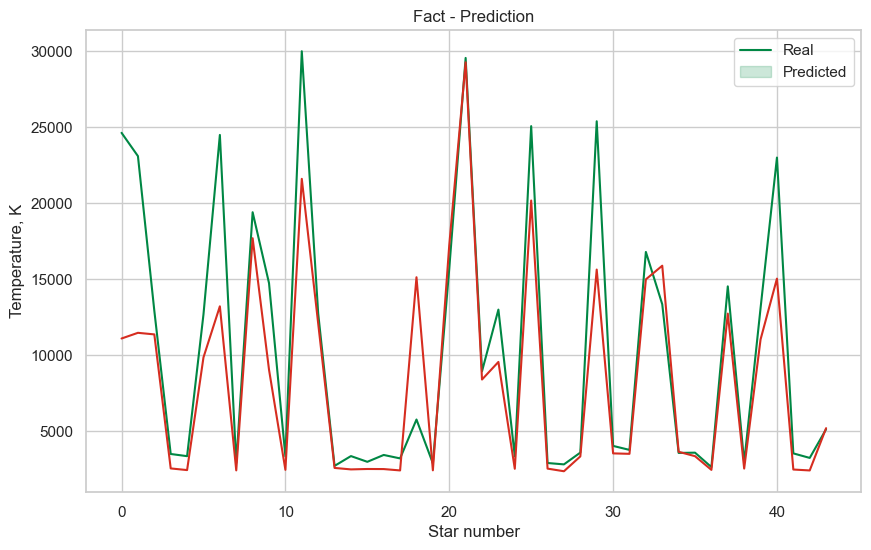

RMSE: 4457.751675452548
R2  : 0.7365544866599438


In [63]:
check_preds(improved_val_ds)
print("RMSE:", mean_squared_error(preds, y_test)**0.5)
print("R2  :", r2_score(y_test, preds))

<div class="alert alert-info"> <b>Комментарий студента:</b> В итоге, модель стала почти в 2 раза хуже. Как же так вышло? И почему оптуна показывала результат в 3 раза меньше?
</div>

Можно увидеть, что нейросеть с подобранными гиперпараметрами демонстрирует более лучший результат на тестовой выборке. Так, RMSE уменьшилось до 4447, а R2 вырос до 0.74, что говорит о достаточно высоком качестве модели.

 <div class="alert alert-success">
<b>Комментарий ревьюера V2✔️:</b> В целом все хорошо, подправь пару моментов и все заработает;)
</div>
            
            
            

## Выводы

В данной работе была построена модель нейронной сети, способной предсказывать температуру поверхности звезд на основе характеристик звезд.

По результатам анализа и обработки данных были полученны следующие выводы:
1. При анализе данных было определена сильная зашумленность и неоднородность данных с присутствием выбросов.
2. В ходе работы удалось построить и улучшить нейронную сеть, достигшую показателя RMSE в 4447 и R2 (0.74) (опиши смысл данных значений)
3. Сравнительный анализ реальных целевых значений и предсказанных показывает, что такое улучшение метрик произошло за счет увеличения точности предсказания более "холодных" звезд, однако у модели возникают сложности с предсказанием высоких температур, что хорошо объясняется малым количеством данных и сильным искажением распределений независимых параметров.

Таким образом, цель работы является выполненной.

 <div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Для подбора еще можно воспользоваться библиотекой scorch
    
Для начала напишем нейросеть:
    
    
```python
    class Model_improve(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_hidden_neurons_3, n_out_neurons, 
                 dropout_1, dropout_2,  dropout_3, activation_1, activation_2):
        super(Model_improve, self).__init__()
        
        <your code>

    def forward(self, x):
        <your code>
        return x

```

    
Вот так можно использовать skorch:) Смотри тут можно применить EarlyStopping:

```python
   from skorch.callbacks import EpochScoring, EarlyStopping
   skorch_regressor = NeuralNetRegressor(module=model_base, 
                                      device='cpu',  
                                      verbose=3,
                                      batch_size=batch_size,
                                      optimizer=torch.optim.Adam, 
                                      max_epochs=2500, 
                                      lr=lr,
                                      train_split=ValidSplit(cv=5),
                                      criterion =nn.MSELoss,
                                      callbacks=[
                ('val_rmse', EpochScoring(scoring=rmse_scorer, lower_is_better=True, name='RMSE')),
                ('estoper', EarlyStopping( lower_is_better=True, monitor='RMSE', patience=patience)),
            ],
                                     ) 
    
```
Осталось разобраться и подставить нужные значения в пропущенные места:)
            
```model_base``` - твоя нейросеть - ```net = Model_improve(<your code>)```
    
    
P.S rmse_scorer можно определить через ```make_scorer```    

    
Задать параметры можно вот так:    
```python
    params = {
    'module__dropout': [0, 0.1],
    'module__n_hidden_neurons_1': range(10, 30, 5),
    'module__n_hidden_neurons_2': range(10, 30, 5),
    'module__activation': [nn.LeakyReLU(), nn.Tanh(), nn.ReLU(), nn.ELU()],
    'lr': [1e-3, 1e-4]
}
```
Обрати внимание, что это только пример!!! его еще необходимо настроить под себя. Чтобы обратиться к параметрам нейросети используй ```module__```, если просто к NeuralNetRegressor, то без приставки:)
    
Подбор паарметров:
    
    
```python
    grid = RandomizedSearchCV(skorch_regressor, params, cv=3, scoring="neg_root_mean_squared_error", verbose=3) 
    grid.fit(X_train_tensor, y_train_tensor.reshape(-1,1)) 
    
    
```
</div>
            
            
            

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 
    
Еще можно было вот так решить:
    
+  https://colab.research.google.com/drive/1ZyMsfYf5c1jzBurRKMIlF8n6Vmn7Lpad?usp=sharing

</div>


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Немного полезного материала:    

1) Ребята из-за "бугра": https://www.reg.ru/blog/stenfordskij-kurs-lekciya-1-vvedenie/ (тут про свёрточные, но интересно)<br>
2) Интересная статья специалиста Тесла: https://karpathy.github.io/neuralnets/ <br>
3) Список книг на выбор: https://habr.com/ru/company/neurodatalab/blog/336218/ <br>



Кстати есть еще нейросеть TabNet, которая заточена для работы с табличными данными:
+  https://habr.com/ru/post/540736/    
+  https://www.kaggle.com/code/carlmcbrideellis/tabnet-a-very-simple-regression-example/notebook

</div>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>
<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>получился хороший проект! 
    
Если есть  если есть какие либо вопросы я с удовольствием на них отвечу:) <br> Исправь, пожалуйста, замечания и жду проект на следующую проверку:) </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Большое спасибо за советы! С нетерпением жду ответов по новым вопросам и новые комментарии!
</div>